In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import pandas as pd
import math

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.ticker import FormatStrFormatter

Вариант 9, использованные файлы: data_1_1.csv, data_2_1.csv, data_6_2.csv, data_6_4.csv. Количество файлов 4

Анализ данных с помощью стандартных методов визуализации



<table style="width:100%">
<tr>
<th>Вопрос</th>
<th>Ответ</th>
</tr>

<tr>
<td>Для каждого параметра определен тип, и в зависимости его типа представлены различные описательные статистики.</td>
<td>В датасете представлено 10 вещественных атрибутов.
Fluctuations_X_in_the_left_bearing, Fluctuations_Y_in_the_left_bearing, Fluctuations_X_in_the_right_bearing, Fluctuations_Y_in_the_right_bearing, Fluctuations_X_in_the_left_bearing_smooth, Fluctuations_Y_in_the_left_bearing_smooth, Fluctuations_X_in_the_right_bearing_smooth, Fluctuations_Y_in_the_right_bearing_smooth, Temperature_in_the_left_bearing и Temperature_in_the_left_bearing. Атрибуты с данными о температуре было решено анализировать отдельно от остальных, потому что они характеризуют другие явления и их значения сильно отличаются от атрибутов, связанных с колебаниями. Для анализа атрибутов было решено использовать гистрограммы, box plot, линейные графики, матрицу корреляции</td>
</tr>
<tr>
<td>1)Есть ли выбросы в данных. Если да, укажите в каких атрибутах.</td>
<td> Выброс в Temperature_in_the_left_bearing при нормальном режиме, а также при втулке с дефектами.</td>
</tr>
<tr>
<td>2) Есть ли переходный период, в течение которой система выходит на режим.
Если да, укажите его длительность (можно указать число записей, которые
описывают этот переходный период)
</td>
<td> В норме температура левого подшипника через примерно 100 000 записей прекращает быстрый рост, при этом температура правого подшипника увеличивается равномерно. При несоосности в муфте и втулке с дефектами наблюдается похожая ситуация. Сделать однозначные выводы о длительности переходного процесса проблематично.
</td>
</tr>
  <tr>
<td>3) Определите, какие атрибуты наиболее сильно отличаются в экспериментах с
дефектами, от нормальных значений
</td>
<td> Больше всего различаются значения атрибутов, связанных с температурой, как в случае втулки с дефектом, так и при неоосности в муфте. Также при несоосности в муфте от нормальных значений значительно отличаются колебания по x в левом подшипнике и чуть меньше колебания по у в правом подшипнике. При втулке с дефектами так же наибольшее отклоение от нормальных значений имеют эти же атрибуты, но колебания по у в правом подшипнике отличаются от нормальных сильнее.</td>
</tr>
    <tr>
<td>4) Можно ли на этапе переходного периода говорить о наличии дефекта? Какие
признаки на это могут указывать?
</td>
<td> При несоосности в муфте левый подшипник колеблется около меньшего числа по x, чем в норме, а правый колеблется около большего числа по y. Также температура в левом подшипнике будет изменяться более равномерно и при этом иметь меньшие значения, чем в норме. В правом подшипнике температура также будет ниже, чем в норме, но характер измения похож на тот, что в норме.
    При наличии втулки с дефектами колебания в левом подшипнике также происходят около меньшего числа, а в правом около большего, особенно это заметно по оси y. Температура в левом и правом подшипниках также будет меньше, чем в норме. В левом подшипнике это наиболее заметно.</td>
</tr>
</table>


In [2]:
df = pd.read_csv('data_1_1.csv')
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601000 entries, 0 to 600999
Data columns (total 10 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Fluctuations_X_in_the_left_bearing          601000 non-null  float64
 1   Fluctuations_Y_in_the_left_bearing          601000 non-null  float64
 2   Fluctuations_X_in_the_right_bearing         601000 non-null  float64
 3   Fluctuations_Y_in_the_right_bearing         601000 non-null  float64
 4   Fluctuations_X_in_the_left_bearing_smooth   601000 non-null  float64
 5   Fluctuations_Y_in_the_left_bearing_smooth   601000 non-null  float64
 6   Fluctuations_X_in_the_right_bearing_smooth  601000 non-null  float64
 7   Fluctuations_Y_in_the_right_bearing_smooth  601000 non-null  float64
 8   Temperature_in_the_left_bearing             601000 non-null  float64
 9   Temperature_in_the_right_bearing            601000 non-null  float64
d

10 вещественных атрибутов, характеризующих колебания и температуру подшипников 

In [3]:
df.describe()

,Fluctuations_X_in_the_left_bearing,Fluctuations_Y_in_the_left_bearing,Fluctuations_X_in_the_right_bearing,Fluctuations_Y_in_the_right_bearing,Fluctuations_X_in_the_left_bearing_smooth,Fluctuations_Y_in_the_left_bearing_smooth,Fluctuations_X_in_the_right_bearing_smooth,Fluctuations_Y_in_the_right_bearing_smooth,Temperature_in_the_left_bearing,Temperature_in_the_right_bearing
count,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000
mean,5.660811,6.404428,5.795032,7.290482,5.660808,6.404427,5.795028,7.290480,1112.050116,1114.851662
std,0.066009,0.074615,0.086633,0.079195,0.054315,0.058677,0.079671,0.071279,3.444639,4.385568
min,5.181000,5.944000,5.417000,6.917000,5.420000,6.174000,5.557000,7.080000,1101.821000,1103.304000
25%,5.617000,6.353000,5.726000,7.229000,5.620000,6.355000,5.728000,7.230000,1110.930000,1112.089000
50%,5.678000,6.403000,5.791000,7.271000,5.683000,6.402000,5.788000,7.269000,1112.951000,1115.845000
75%,5.706000,6.456000,5.862000,7.355000,5.702000,6.454000,5.862000,7.354000,1114.662000,1118.446000
max,6.128000,7.036000,6.316000,7.898000,5.851000,6.712000,6.059000,7.594000,1115.515000,1120.631000


In [4]:
# определим функции для построения множества гистограмм с одинаковыми настройками
def hist_for_atribute_set(df, labels, ax, bin_num=25, df2=pd.DataFrame(), 
                          ylim=None, ylabel=None, y_scale='linear'):
      
  for i, col in enumerate(labels):
    ax[i].set_yscale(y_scale)   
    ax[i].tick_params(labelsize=10)
    ax[i].set_xlabel(col)
    
    # уберем лишние границы графика
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].grid()

    ax[i].hist(df[col], bin_num, density=False, color='#377eb8', alpha=.75) # синий 
    if (not df2.empty):
      ax[i].hist(df2[col], bin_num, density=False, color='#e41a1c', alpha=.45) # красный '#e41a1c' 

  # если графиков меньше чем есть в сетке, убираем лишние оси
  len_labels = len(labels)
  len_ax = len(ax)
  if len_labels < len_ax:
    for ax in ax[len_labels : len_labels + (len_ax - len_labels)]:
      ax.axis('off')




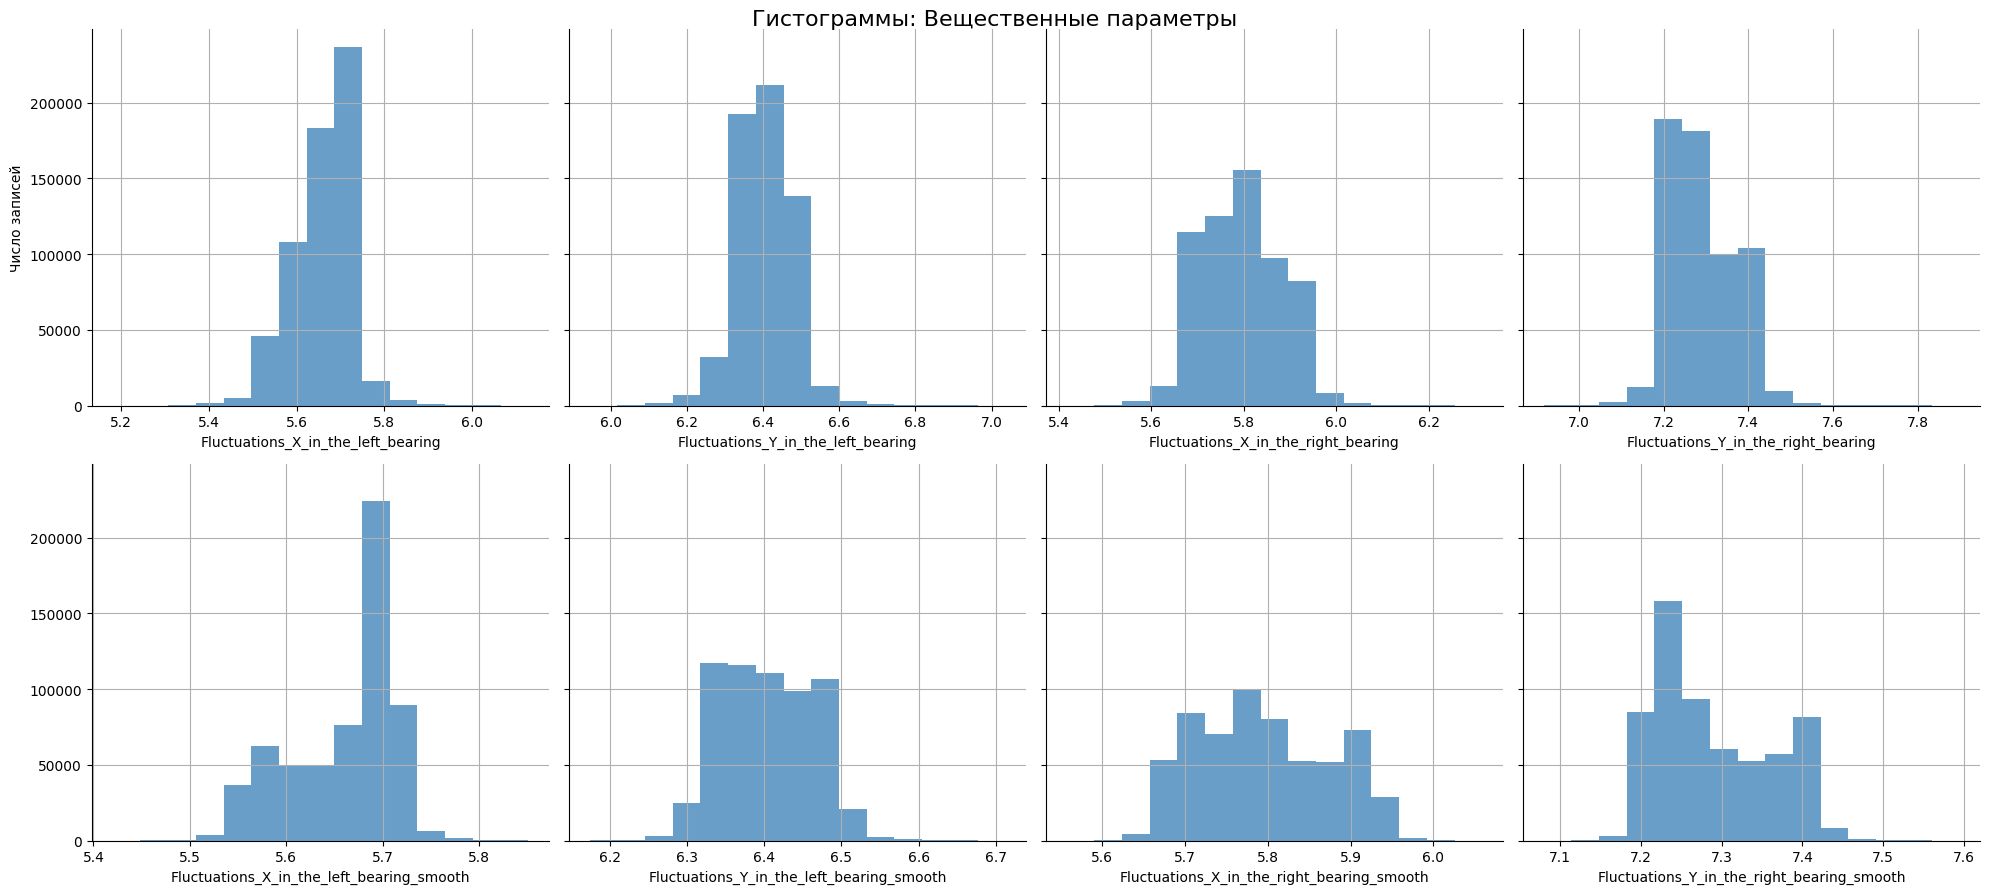

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=4, sharey=True, figsize=(20, 10))
ax = np.reshape(ax, (1,np.product(ax.shape)))[0]
# поэкспериментируйте с масштабом оси Y, параметр y_scale ('linear, 'symlog', 'log')
labels = list(df.columns)
labels.remove('Temperature_in_the_left_bearing')
labels.remove('Temperature_in_the_right_bearing')
hist_for_atribute_set(df, labels, ax, bin_num=15, y_scale='linear') 

ax[0].set_ylabel('Число записей')
plt.suptitle('Гистограммы: Вещественные параметры', fontsize=16, y=.92)
fig.tight_layout(rect=[0, .03, 1, .95])

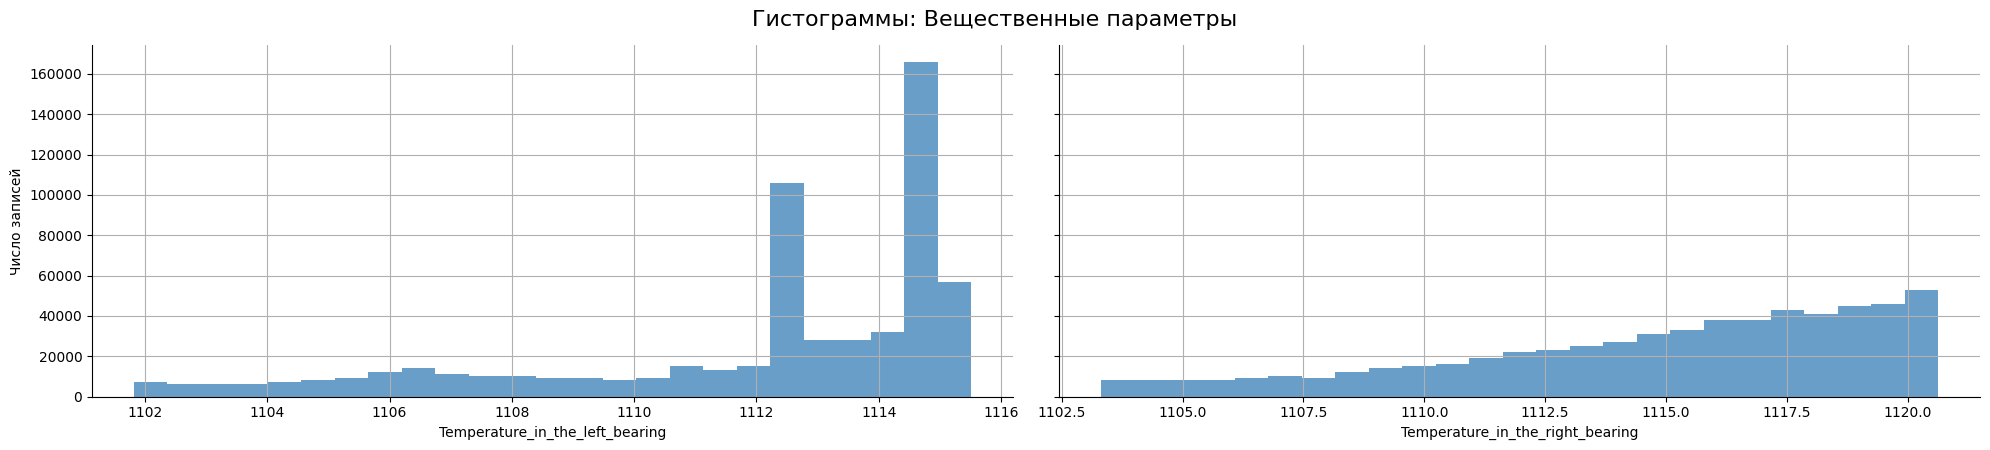

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(20, 5))
labels = ['Temperature_in_the_left_bearing', 'Temperature_in_the_right_bearing'] 
hist_for_atribute_set(df, labels, ax, bin_num=25, y_scale='linear') 

ax[0].set_ylabel('Число записей')
plt.suptitle('Гистограммы: Вещественные параметры', fontsize=16, y=.92)
fig.tight_layout(rect=[0, .03, 1, .95])

In [7]:
df2 = pd.read_csv('data_6_2.csv')
df2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601000 entries, 0 to 600999
Data columns (total 10 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Fluctuations_X_in_the_left_bearing          601000 non-null  float64
 1   Fluctuations_Y_in_the_left_bearing          601000 non-null  float64
 2   Fluctuations_X_in_the_right_bearing         601000 non-null  float64
 3   Fluctuations_Y_in_the_right_bearing         601000 non-null  float64
 4   Fluctuations_X_in_the_left_bearing_smooth   601000 non-null  float64
 5   Fluctuations_Y_in_the_left_bearing_smooth   601000 non-null  float64
 6   Fluctuations_X_in_the_right_bearing_smooth  601000 non-null  float64
 7   Fluctuations_Y_in_the_right_bearing_smooth  601000 non-null  float64
 8   Temperature_in_the_left_bearing             601000 non-null  float64
 9   Temperature_in_the_right_bearing            601000 non-null  float64
d

In [8]:
df2.describe()

,Fluctuations_X_in_the_left_bearing,Fluctuations_Y_in_the_left_bearing,Fluctuations_X_in_the_right_bearing,Fluctuations_Y_in_the_right_bearing,Fluctuations_X_in_the_left_bearing_smooth,Fluctuations_Y_in_the_left_bearing_smooth,Fluctuations_X_in_the_right_bearing_smooth,Fluctuations_Y_in_the_right_bearing_smooth,Temperature_in_the_left_bearing,Temperature_in_the_right_bearing
count,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000
mean,5.660811,6.404428,5.795032,7.290482,5.660808,6.404427,5.795028,7.290480,1112.050116,1114.851662
std,0.066009,0.074615,0.086633,0.079195,0.054315,0.058677,0.079671,0.071279,3.444639,4.385568
min,5.181000,5.944000,5.417000,6.917000,5.420000,6.174000,5.557000,7.080000,1101.821000,1103.304000
25%,5.617000,6.353000,5.726000,7.229000,5.620000,6.355000,5.728000,7.230000,1110.930000,1112.089000
50%,5.678000,6.403000,5.791000,7.271000,5.683000,6.402000,5.788000,7.269000,1112.951000,1115.845000
75%,5.706000,6.456000,5.862000,7.355000,5.702000,6.454000,5.862000,7.354000,1114.662000,1118.446000
max,6.128000,7.036000,6.316000,7.898000,5.851000,6.712000,6.059000,7.594000,1115.515000,1120.631000


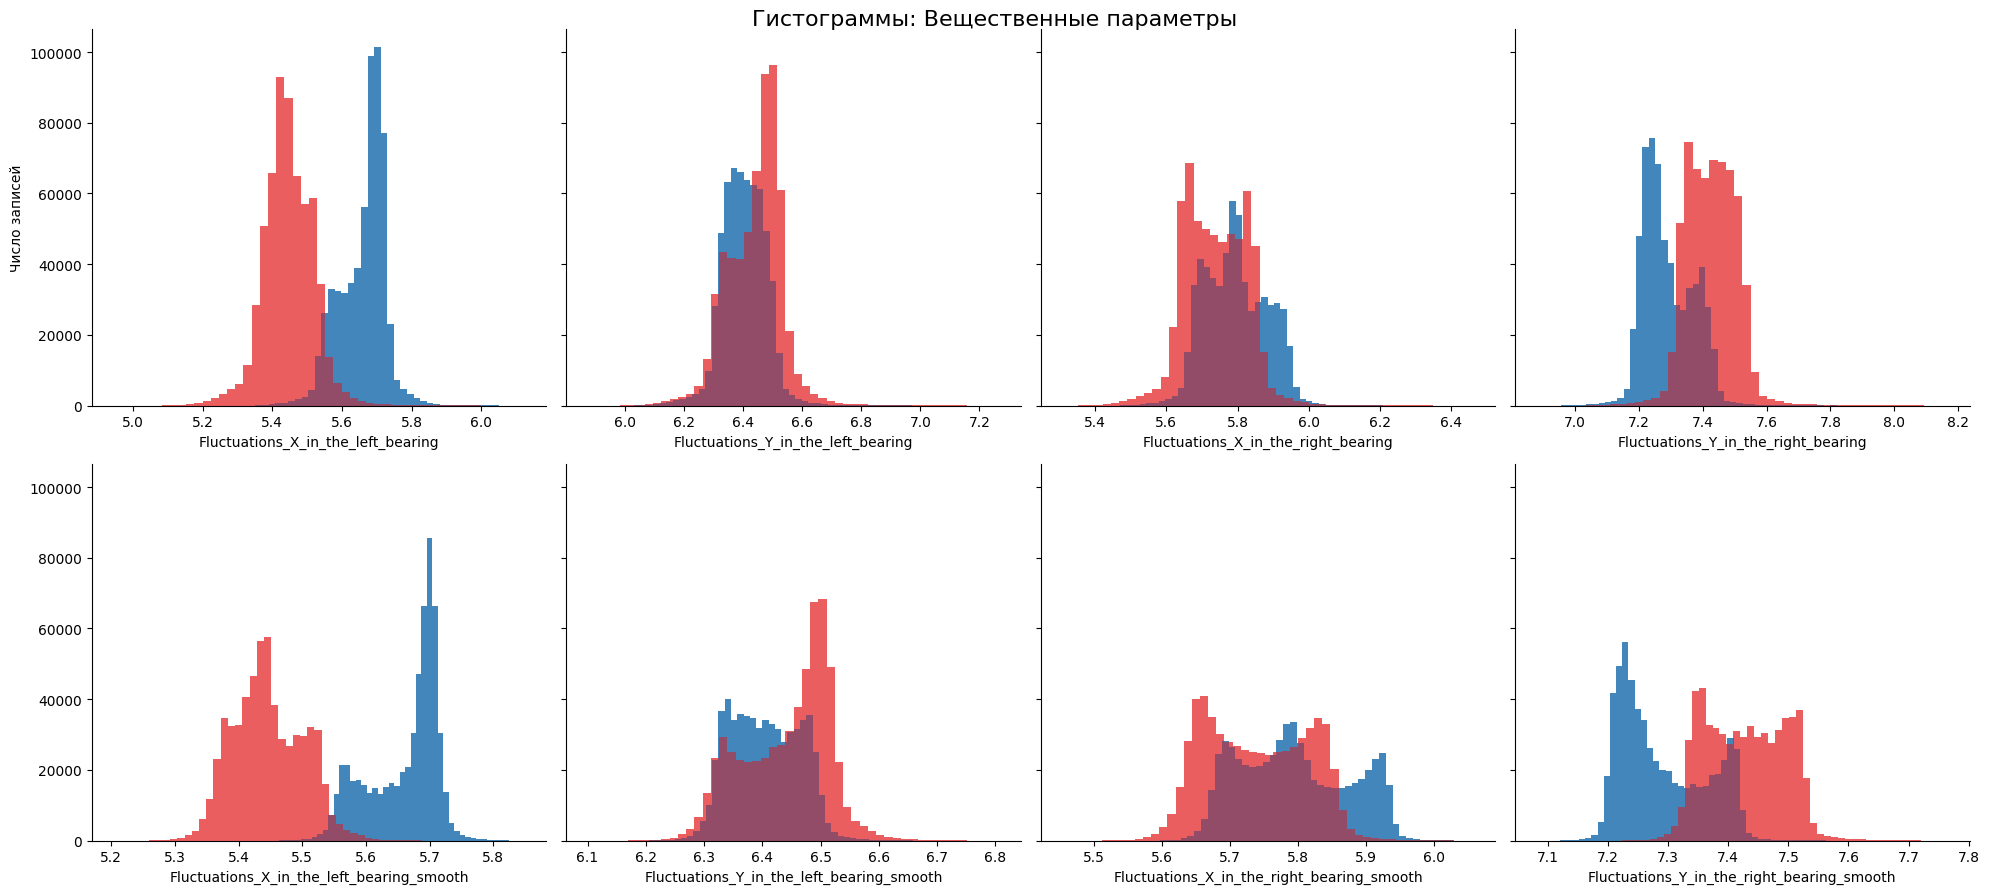

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=4, sharey=True, figsize=(20, 10))
ax = np.reshape(ax, (1,np.product(ax.shape)))[0]
# поэкспериментируйте с масштабом оси Y, параметр y_scale ('linear, 'symlog', 'log')
labels = list(df.columns)
labels.remove('Temperature_in_the_left_bearing')
labels.remove('Temperature_in_the_right_bearing')
hist_for_atribute_set(df, labels, ax, bin_num=50, df2=df2, y_scale='linear')
hist_for_atribute_set(df, labels, ax, bin_num=50, df2=df2, y_scale='linear')

ax[0].set_ylabel('Число записей')
plt.suptitle('Гистограммы: Вещественные параметры', fontsize=16, y=.92)
fig.tight_layout(rect=[0, .03, 1, .95])

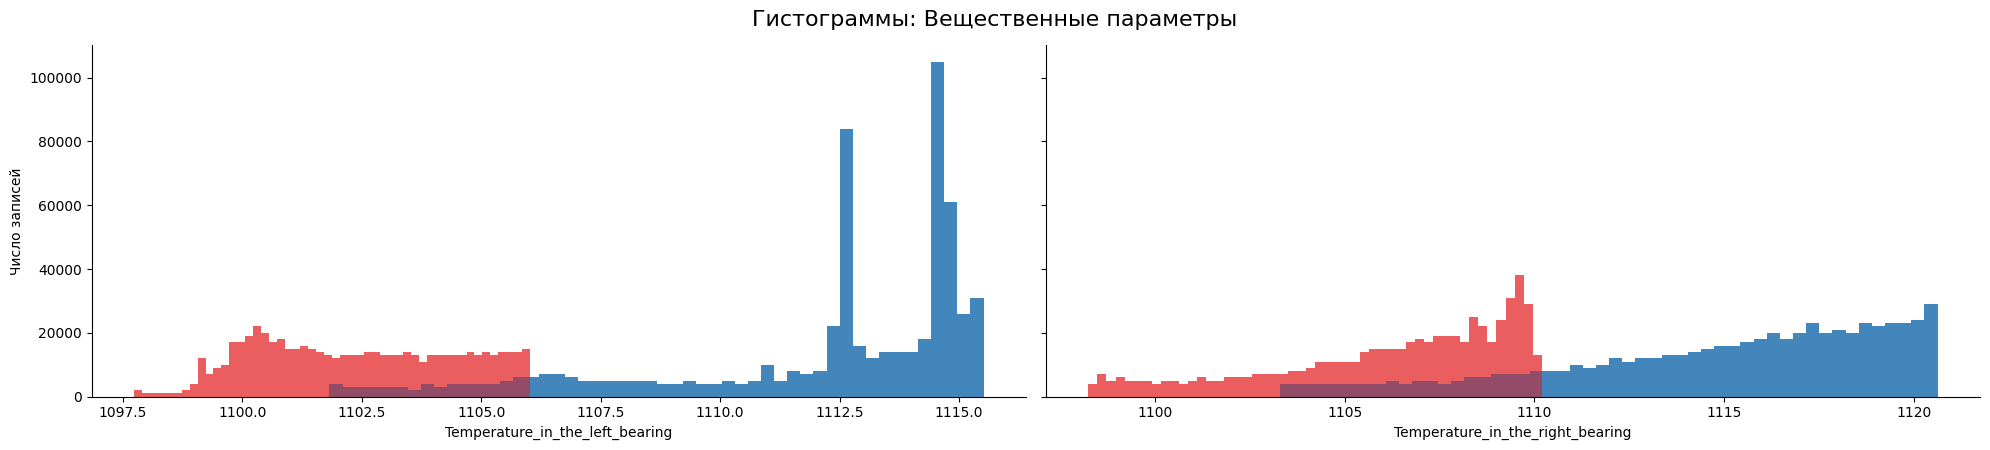

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(20, 5))
labels = ['Temperature_in_the_left_bearing', 'Temperature_in_the_right_bearing'] 
hist_for_atribute_set(df, labels, ax, bin_num=50, df2=df2, y_scale='linear')
hist_for_atribute_set(df, labels, ax, bin_num=50, df2=df2, y_scale='linear') 

ax[0].set_ylabel('Число записей')
plt.suptitle('Гистограммы: Вещественные параметры', fontsize=16, y=.92)
fig.tight_layout(rect=[0, .03, 1, .95])

In [11]:
# аналогичным образом можно определить функцию для построения множества ящиков с усами.
def boxplot_for_atribute_set(df, labels, ax, ylim=None, ylabel=None):
  flierprops = dict(marker='o', markersize=3)
  
  for i, col in enumerate(labels):
    ax.boxplot(df[col], positions=[i + 1], flierprops=flierprops) # i + 1
    ax.tick_params(labelsize=10)
    ax.set_xticks(np.arange(len(labels)) + 1, labels)
            
    if ylim:
      ax.set_ylim(ylim)

    if ylabel:
      ax.set_ylabel(ylabel)

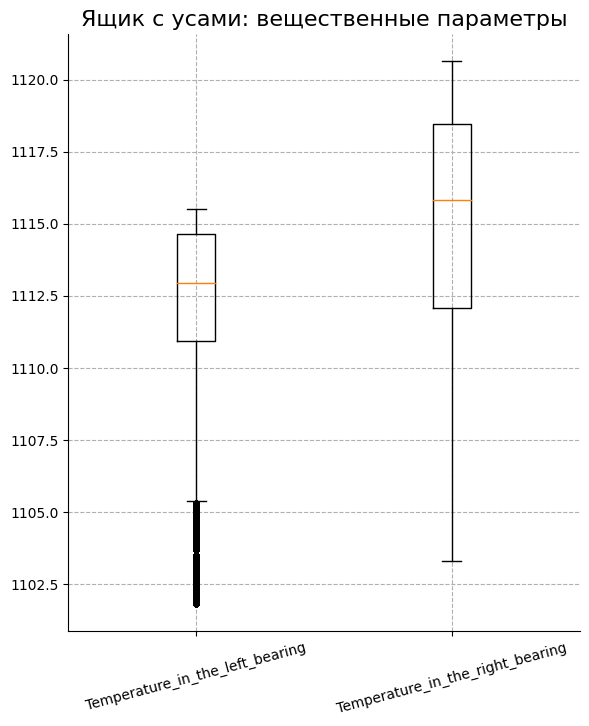

In [12]:
fig, ax = plt.subplots(sharey=True, figsize=(20, 8))
fig.set_figwidth(6)
plt.xticks(rotation=15)
boxplot_for_atribute_set(df, labels, ax)
ax.set_title('Ящик с усами: вещественные параметры', fontsize=16)

# уберем лишние границы графика
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# добавили немного больше координатной сетке, 
# чтобы более точно определить диапазоны значений
minor_ticks = np.arange(0, 101, 5)

ax.grid(linestyle='--' )
fig.tight_layout(rect=[0, .03, 1, .95])

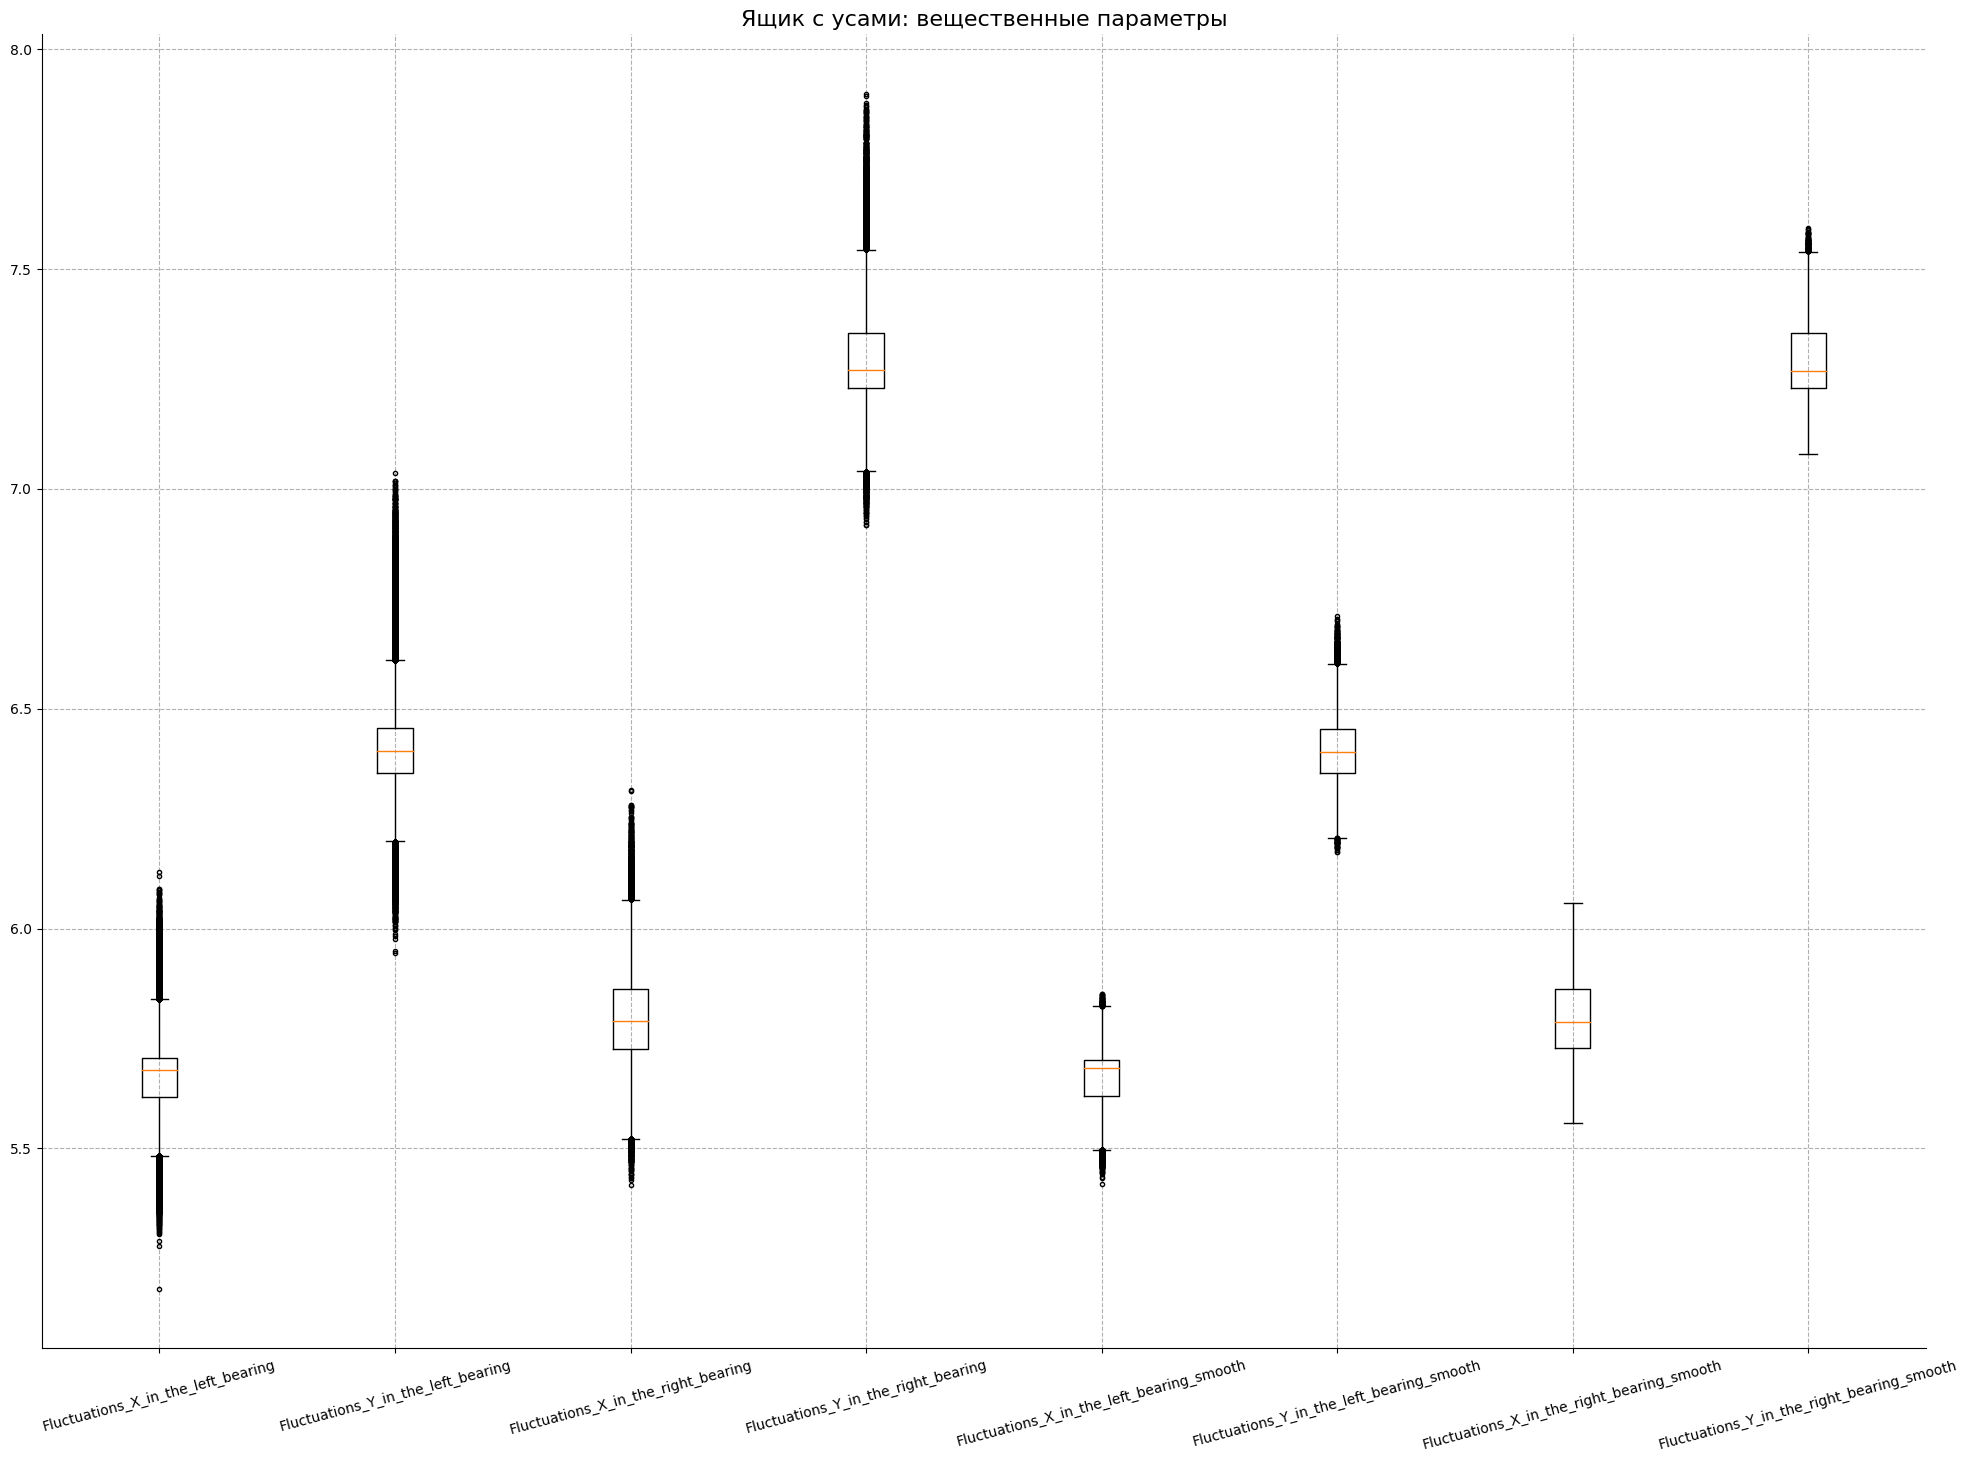

In [13]:
fig, ax = plt.subplots(sharey=True, figsize=(20, 16))
fig.set_figwidth(20)
plt.xticks(rotation=15)
labels = list(df.columns)
labels.remove('Temperature_in_the_left_bearing')
labels.remove('Temperature_in_the_right_bearing')
boxplot_for_atribute_set(df, labels, ax)
ax.set_title('Ящик с усами: вещественные параметры', fontsize=16)

# уберем лишние границы графика
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# добавили немного больше координатной сетке, 
# чтобы более точно определить диапазоны значений
minor_ticks = np.arange(0, 101, 5)

ax.grid(linestyle='--' )
fig.tight_layout(rect=[0, .03, 1, .95])

In [14]:
def lineplot_for_atribute_set(df, df_x, labels, ax, ylim=None, ylabel=None):
   
  for i, col in enumerate(labels):
    ax[i].set_xlabel(col)
    ax[i].plot(df_x, df[col], color='black', linewidth=.65, label=' ')
        
    # уберем лишние границы графика
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].legend(loc='upper right')
    ax[i].grid()

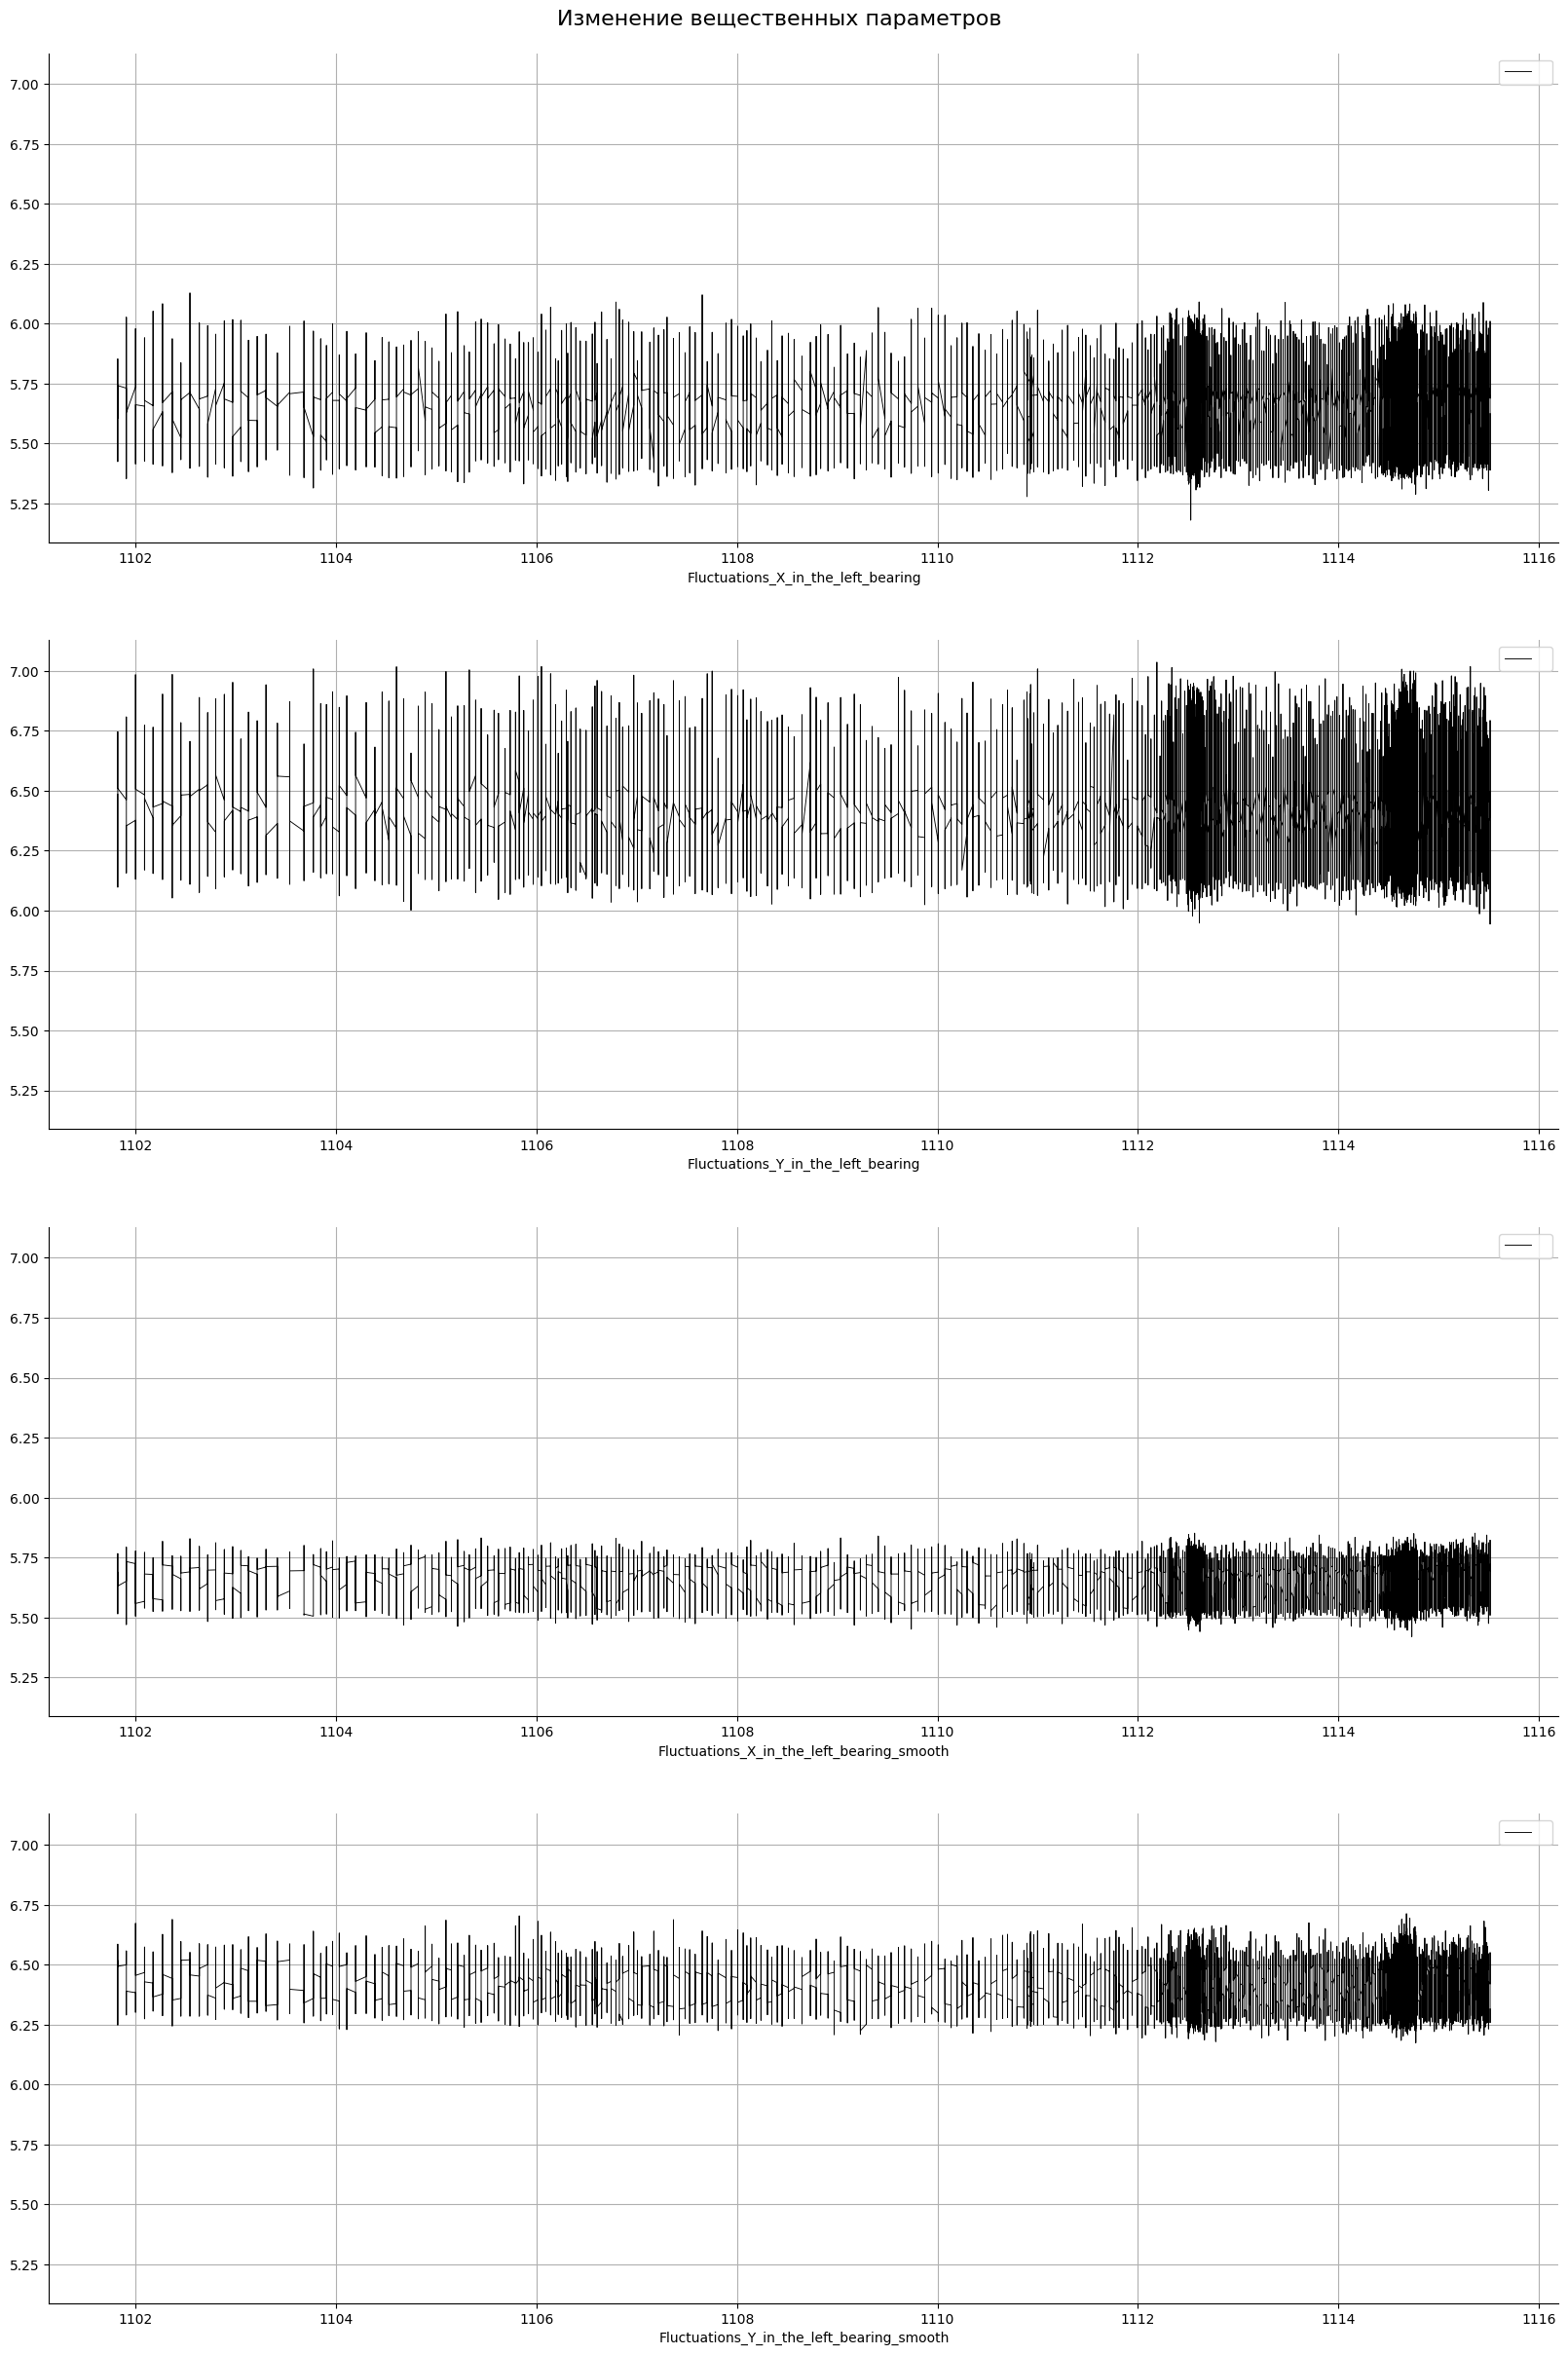

In [15]:
labels = list(df.columns)
labels.remove('Temperature_in_the_left_bearing')
labels.remove('Temperature_in_the_right_bearing')
labels.remove('Fluctuations_X_in_the_right_bearing')
labels.remove('Fluctuations_Y_in_the_right_bearing')
labels.remove('Fluctuations_X_in_the_right_bearing_smooth')
labels.remove('Fluctuations_Y_in_the_right_bearing_smooth')

    
fig, ax = plt.subplots(nrows=4, ncols=1, sharey=True, figsize=(20, 30))

lineplot_for_atribute_set(df, df['Temperature_in_the_left_bearing'],  labels, ax)
fig.suptitle('Изменение вещественных параметров', fontsize=16, y=.895)
plt.show()

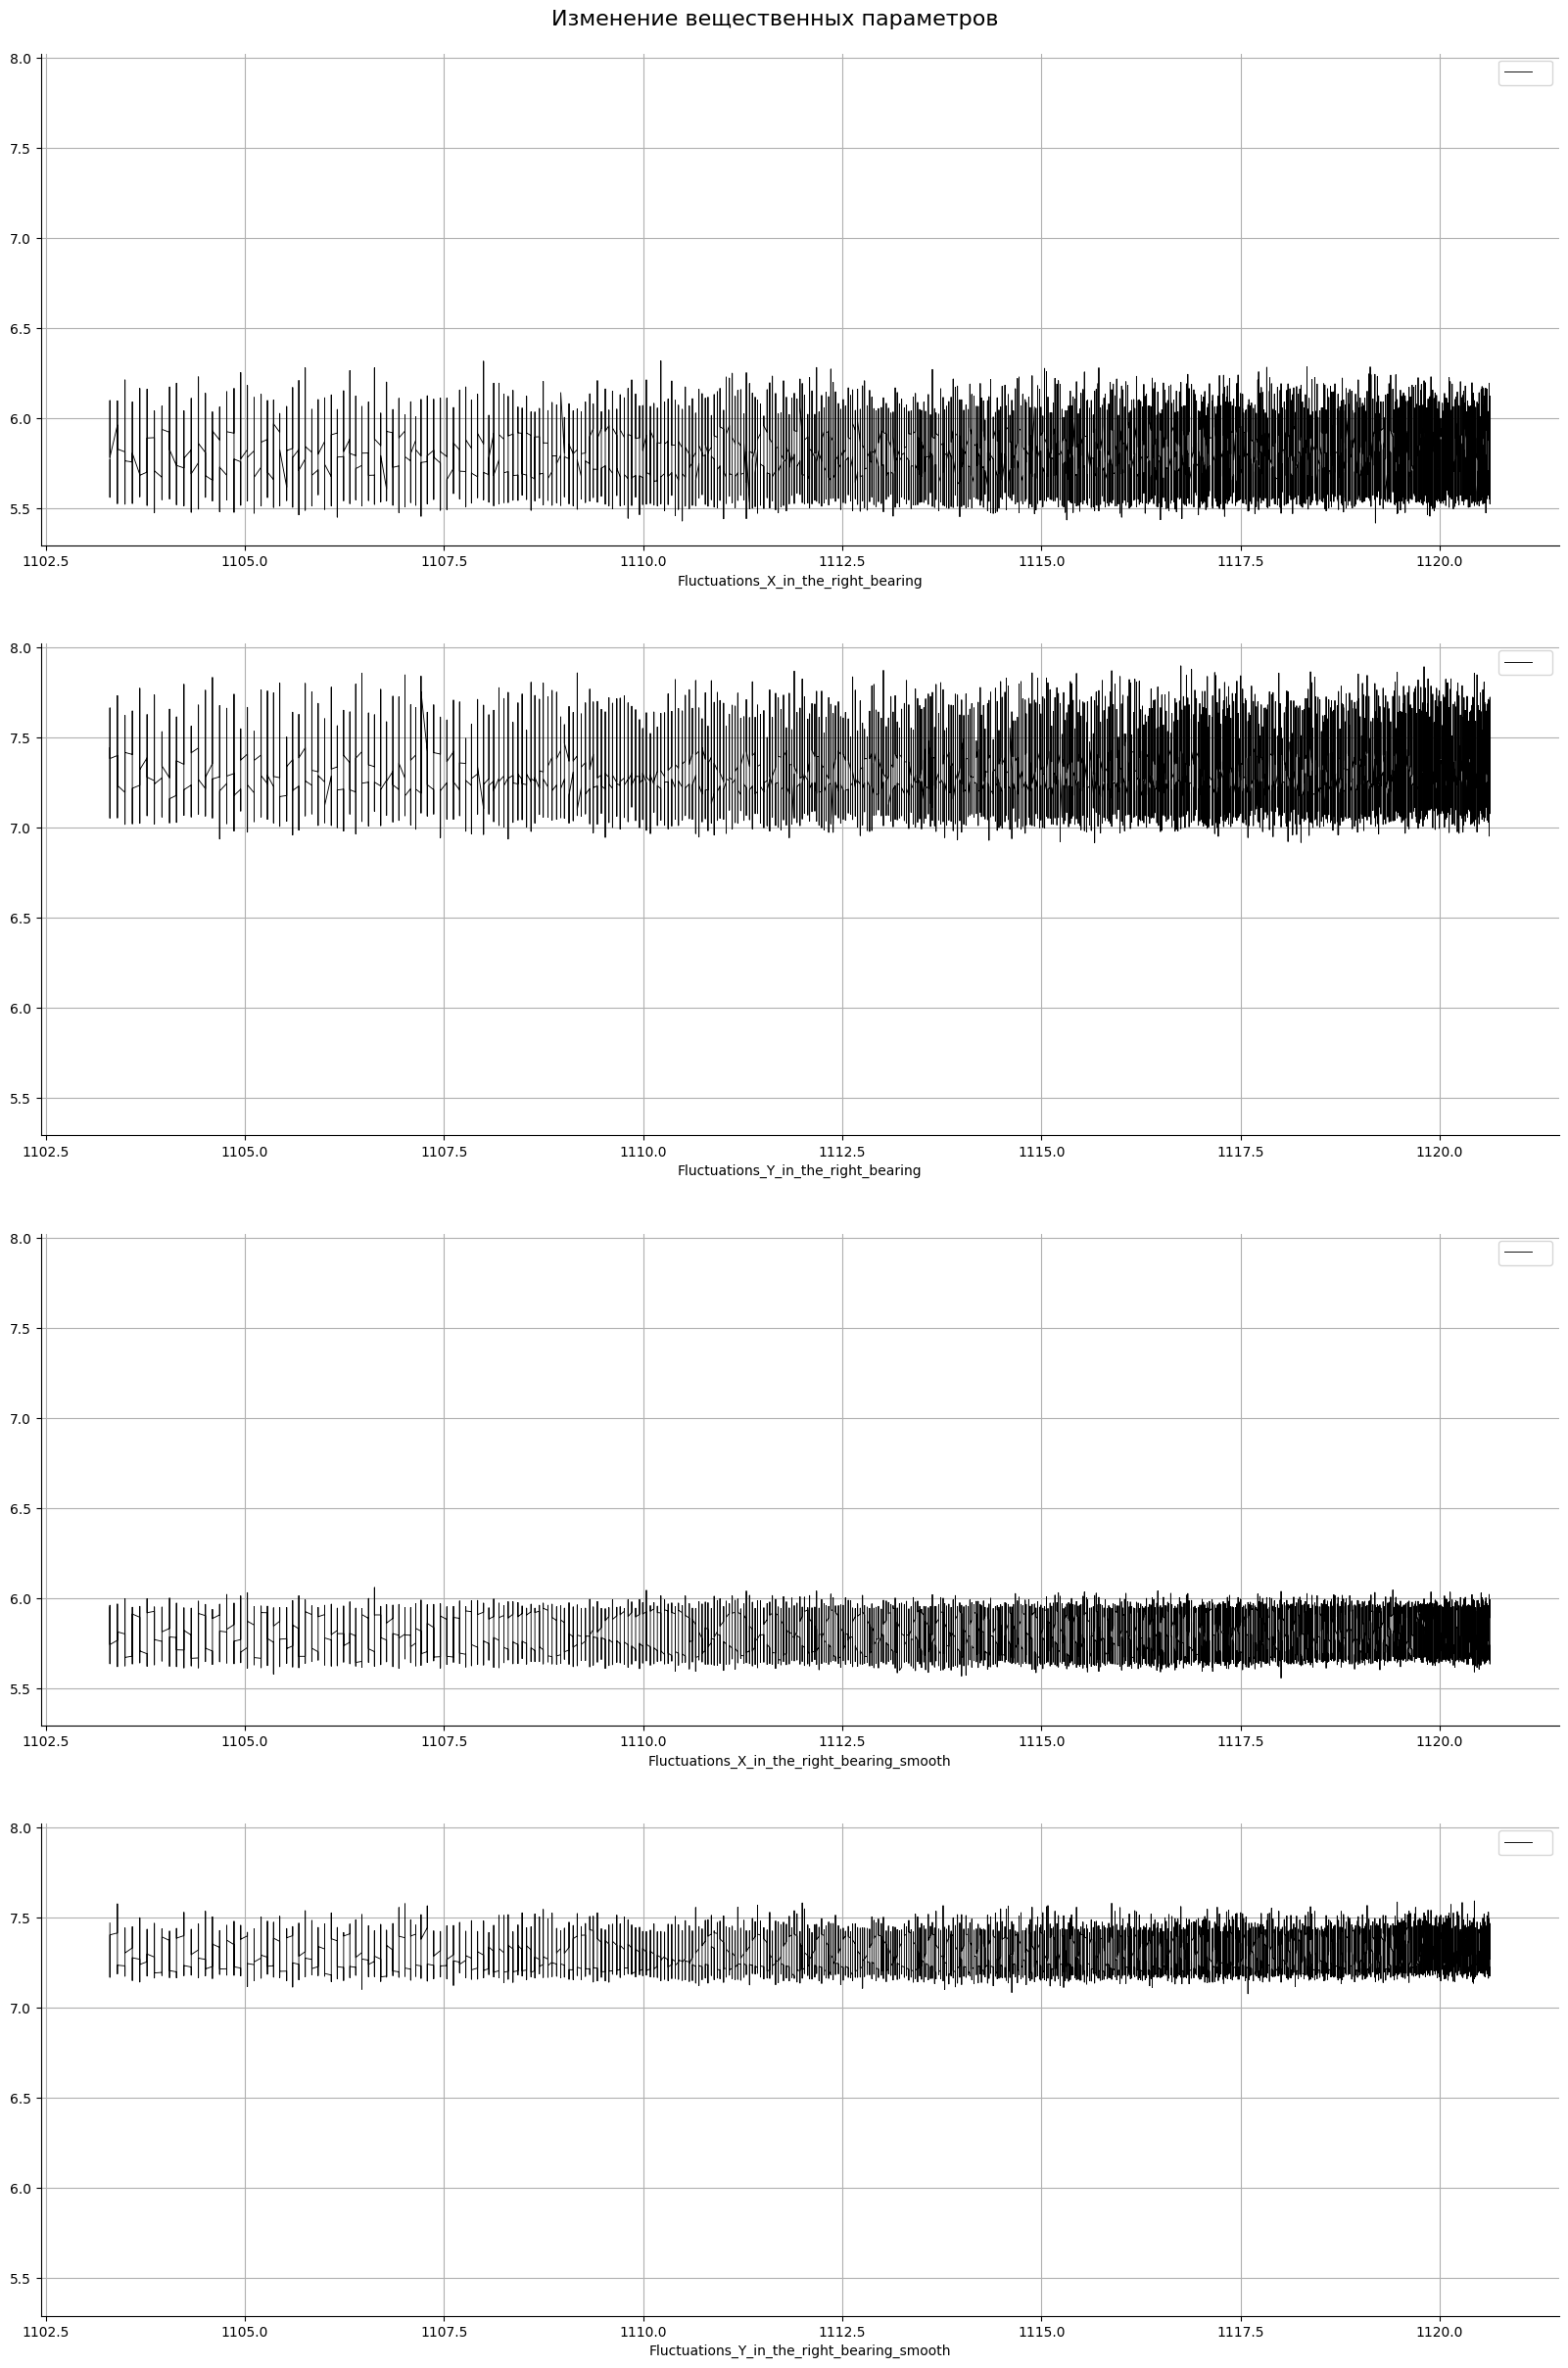

In [16]:
labels = list(df.columns)
labels.remove('Temperature_in_the_left_bearing')
labels.remove('Temperature_in_the_right_bearing')
labels.remove('Fluctuations_X_in_the_left_bearing')
labels.remove('Fluctuations_Y_in_the_left_bearing')
labels.remove('Fluctuations_X_in_the_left_bearing_smooth')
labels.remove('Fluctuations_Y_in_the_left_bearing_smooth')

    
fig, ax = plt.subplots(nrows=4, ncols=1, sharey=True, figsize=(20, 30))

lineplot_for_atribute_set(df, df['Temperature_in_the_right_bearing'],  labels, ax)
fig.suptitle('Изменение вещественных параметров', fontsize=16, y=.895)
plt.show()

In [17]:
def heatmap(df, ax, title):
  corr = df.corr()

  # пропустим пары со слабой корреляцией, попробуем поэкспериментировать с этой настройкой
  df_corr = corr[(corr>=.5) | (corr<=-.5)]

  # print(f'Empty columns: {get_empty_columns_names(df_corr)}')

  mask = np.triu(np.ones_like(corr))
  sns.heatmap(
    df_corr, 
    cbar=False, 
    mask=mask,
    ax=ax, 
    annot=True, 
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
  )

  ax.title.set_text(title)
  ax.tick_params(
    top=False,
    bottom=False,
    left=False,
    right=False,
  ) 

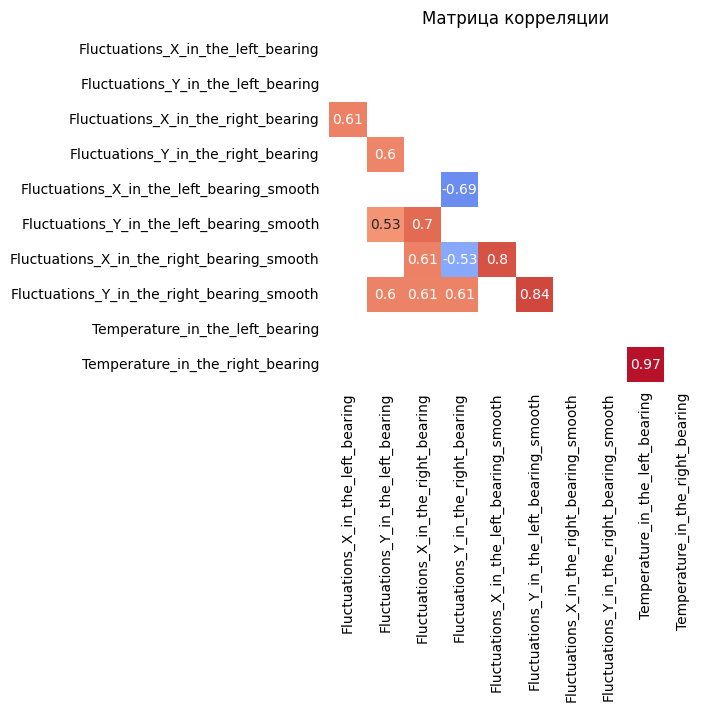

In [18]:
corr_labels = list(df.columns)
fig, ax = plt.subplots(figsize=(7, 7), constrained_layout=True)
hm = heatmap(df[corr_labels], ax, 'Матрица корреляции')

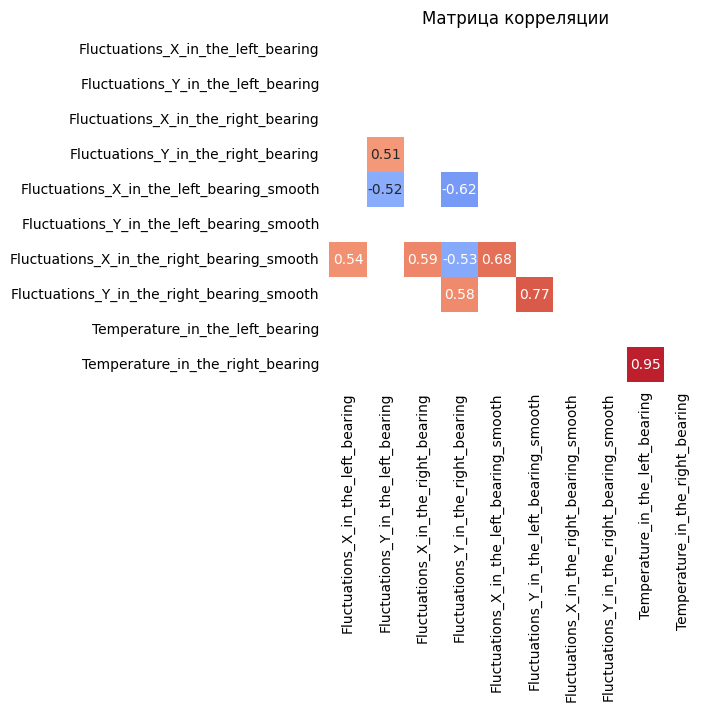

In [19]:
corr_labels = list(df2.columns)
fig, ax = plt.subplots(figsize=(7, 7), constrained_layout=True)
hm = heatmap(df2[corr_labels], ax, 'Матрица корреляции')

In [20]:
df = pd.read_csv('data__1.csv')
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601000 entries, 0 to 600999
Data columns (total 10 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Fluctuations_X_in_the_left_bearing          601000 non-null  float64
 1   Fluctuations_Y_in_the_left_bearing          601000 non-null  float64
 2   Fluctuations_X_in_the_right_bearing         601000 non-null  float64
 3   Fluctuations_Y_in_the_right_bearing         601000 non-null  float64
 4   Fluctuations_X_in_the_left_bearing_smooth   601000 non-null  float64
 5   Fluctuations_Y_in_the_left_bearing_smooth   601000 non-null  float64
 6   Fluctuations_X_in_the_right_bearing_smooth  601000 non-null  float64
 7   Fluctuations_Y_in_the_right_bearing_smooth  601000 non-null  float64
 8   Temperature_in_the_left_bearing             601000 non-null  float64
 9   Temperature_in_the_right_bearing            601000 non-null  float64
d

In [21]:
df.describe()

,Fluctuations_X_in_the_left_bearing,Fluctuations_Y_in_the_left_bearing,Fluctuations_X_in_the_right_bearing,Fluctuations_Y_in_the_right_bearing,Fluctuations_X_in_the_left_bearing_smooth,Fluctuations_Y_in_the_left_bearing_smooth,Fluctuations_X_in_the_right_bearing_smooth,Fluctuations_Y_in_the_right_bearing_smooth,Temperature_in_the_left_bearing,Temperature_in_the_right_bearing
count,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000,601000.000000
mean,5.571453,6.337228,5.724601,7.226647,5.571455,6.337226,5.724596,7.226647,1114.931075,1114.450226
std,0.063368,0.081918,0.073419,0.073006,0.052172,0.067517,0.064341,0.063811,3.088639,4.006334
min,5.226000,5.877000,5.305000,6.813000,5.366000,6.077000,5.510000,7.003000,1104.633000,1104.664000
25%,5.530000,6.279000,5.673000,7.173000,5.531000,6.280000,5.674000,7.175000,1113.949000,1111.534000
50%,5.579000,6.331000,5.713000,7.212000,5.579000,6.330000,5.710000,7.209000,1116.432000,1115.217000
75%,5.615000,6.397000,5.780000,7.283000,5.614000,6.396000,5.778000,7.282000,1116.838000,1117.892000
max,6.035000,7.002000,6.274000,7.818000,5.790000,6.673000,5.990000,7.546000,1117.301000,1119.918000


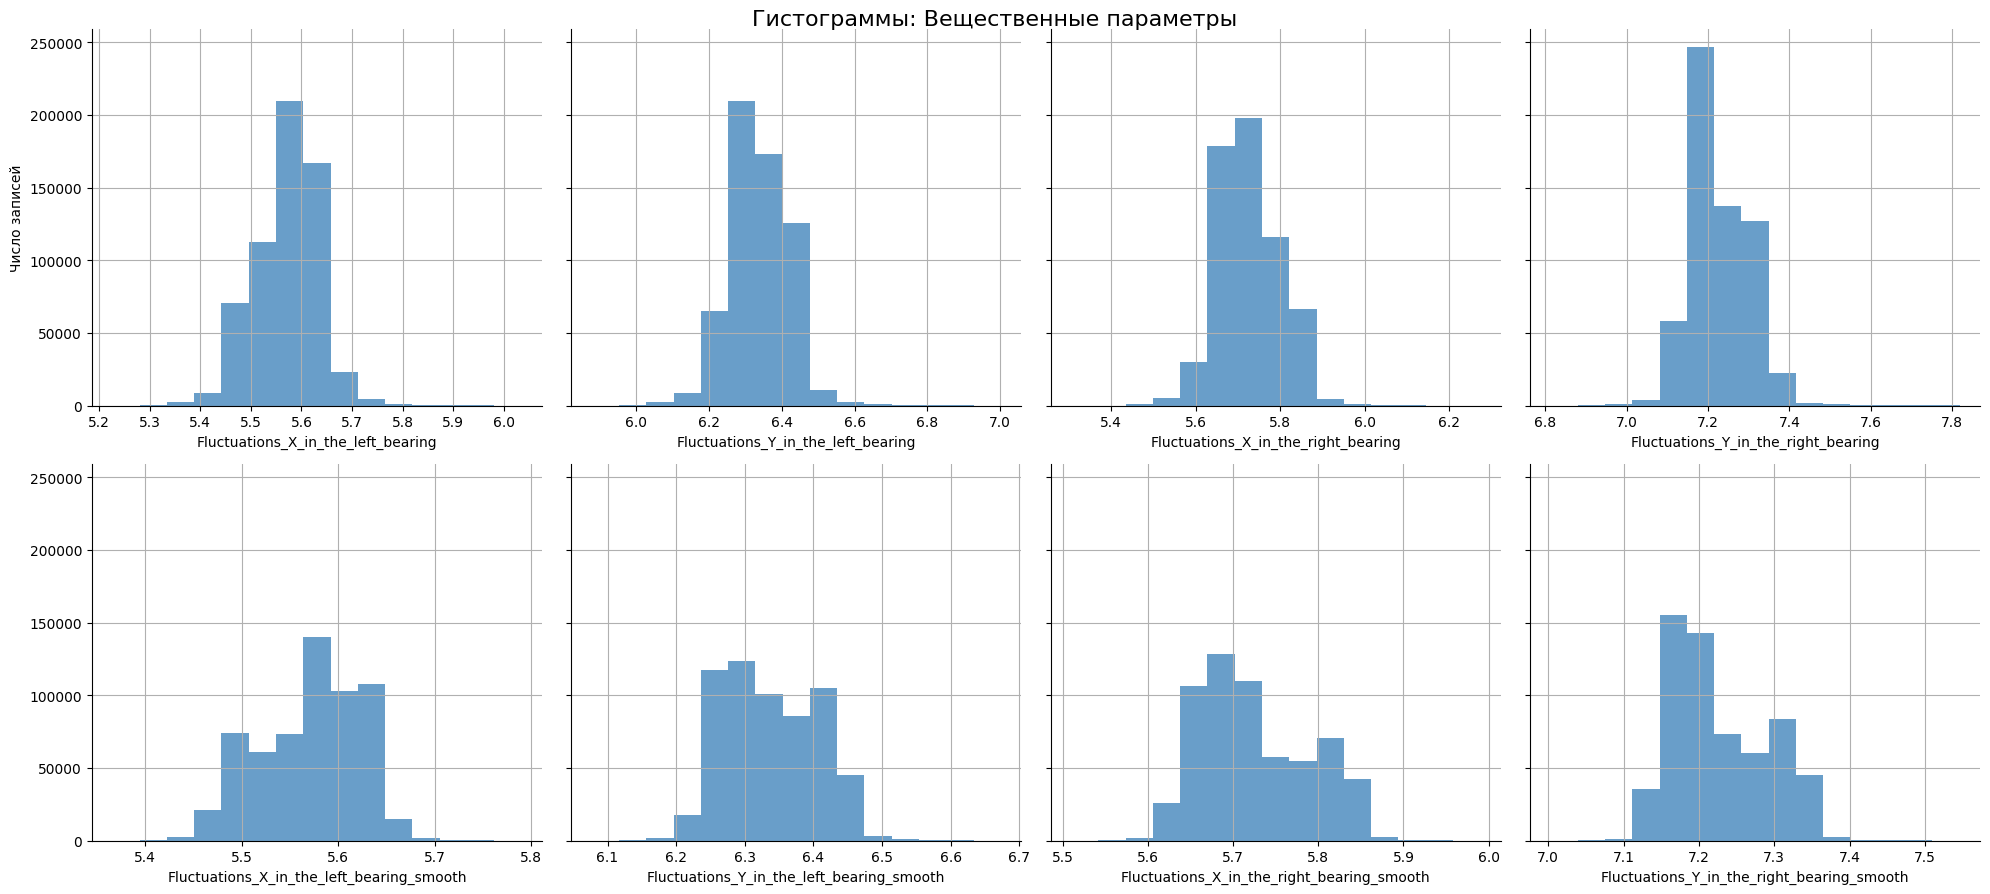

In [22]:
fig, ax = plt.subplots(nrows=2, ncols=4, sharey=True, figsize=(20, 10))
ax = np.reshape(ax, (1,np.product(ax.shape)))[0]
# поэкспериментируйте с масштабом оси Y, параметр y_scale ('linear, 'symlog', 'log')
labels = list(df.columns)
labels.remove('Temperature_in_the_left_bearing')
labels.remove('Temperature_in_the_right_bearing')
hist_for_atribute_set(df, labels, ax, bin_num=15, y_scale='linear') 

ax[0].set_ylabel('Число записей')
plt.suptitle('Гистограммы: Вещественные параметры', fontsize=16, y=.92)
fig.tight_layout(rect=[0, .03, 1, .95])

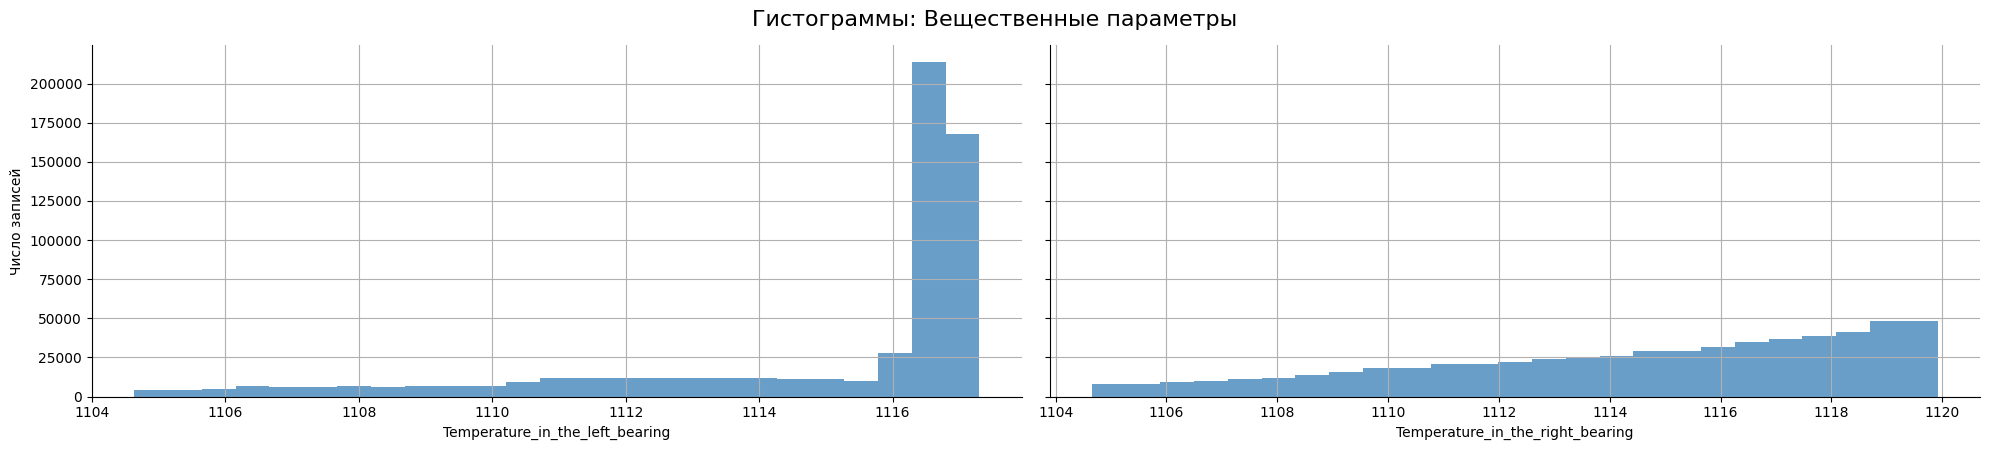

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(20, 5))
labels = ['Temperature_in_the_left_bearing', 'Temperature_in_the_right_bearing'] 
hist_for_atribute_set(df, labels, ax, bin_num=25, y_scale='linear') 

ax[0].set_ylabel('Число записей')
plt.suptitle('Гистограммы: Вещественные параметры', fontsize=16, y=.92)
fig.tight_layout(rect=[0, .03, 1, .95])

In [24]:
df2 = pd.read_csv('data_6_2.csv')
df2.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601000 entries, 0 to 600999
Data columns (total 10 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Fluctuations_X_in_the_left_bearing          601000 non-null  float64
 1   Fluctuations_Y_in_the_left_bearing          601000 non-null  float64
 2   Fluctuations_X_in_the_right_bearing         601000 non-null  float64
 3   Fluctuations_Y_in_the_right_bearing         601000 non-null  float64
 4   Fluctuations_X_in_the_left_bearing_smooth   601000 non-null  float64
 5   Fluctuations_Y_in_the_left_bearing_smooth   601000 non-null  float64
 6   Fluctuations_X_in_the_right_bearing_smooth  601000 non-null  float64
 7   Fluctuations_Y_in_the_right_bearing_smooth  601000 non-null  float64
 8   Temperature_in_the_left_bearing             601000 non-null  float64
 9   Temperature_in_the_right_bearing            601000 non-null  float64
d

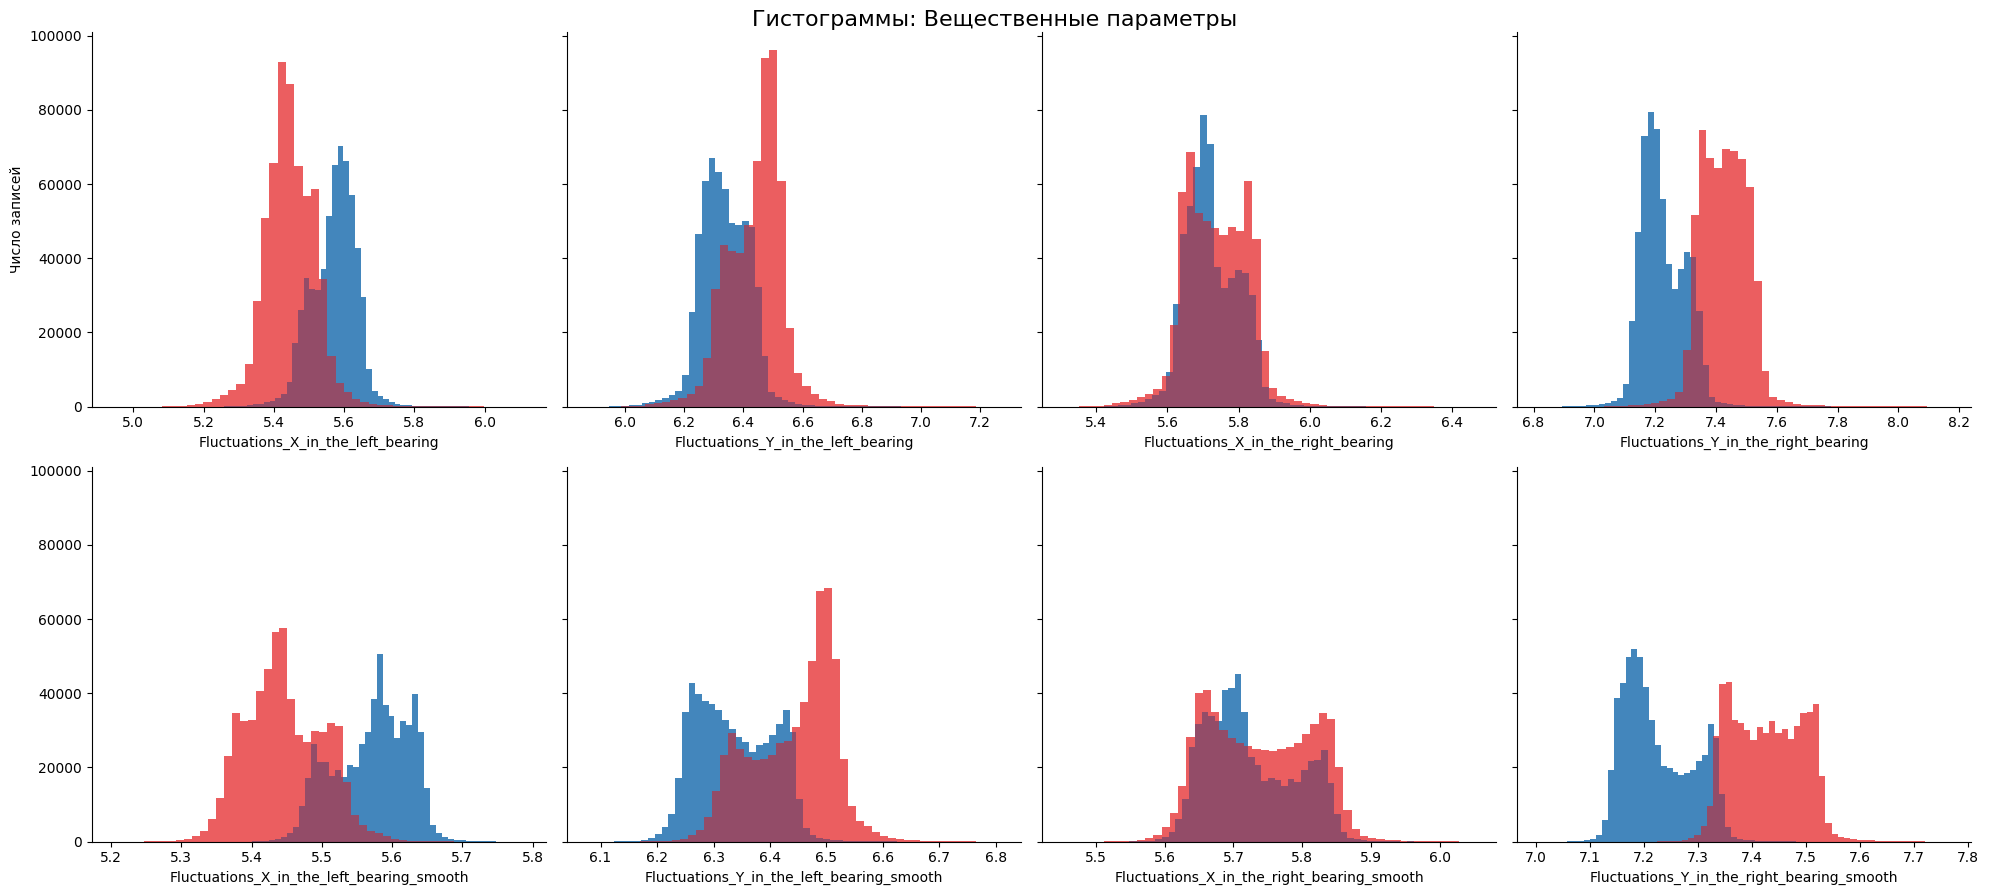

In [25]:
fig, ax = plt.subplots(nrows=2, ncols=4, sharey=True, figsize=(20, 10))
ax = np.reshape(ax, (1,np.product(ax.shape)))[0]
# поэкспериментируйте с масштабом оси Y, параметр y_scale ('linear, 'symlog', 'log')
labels = list(df.columns)
labels.remove('Temperature_in_the_left_bearing')
labels.remove('Temperature_in_the_right_bearing')
hist_for_atribute_set(df, labels, ax, bin_num=50, df2=df2, y_scale='linear')
hist_for_atribute_set(df, labels, ax, bin_num=50, df2=df2, y_scale='linear')

ax[0].set_ylabel('Число записей')
plt.suptitle('Гистограммы: Вещественные параметры', fontsize=16, y=.92)
fig.tight_layout(rect=[0, .03, 1, .95])

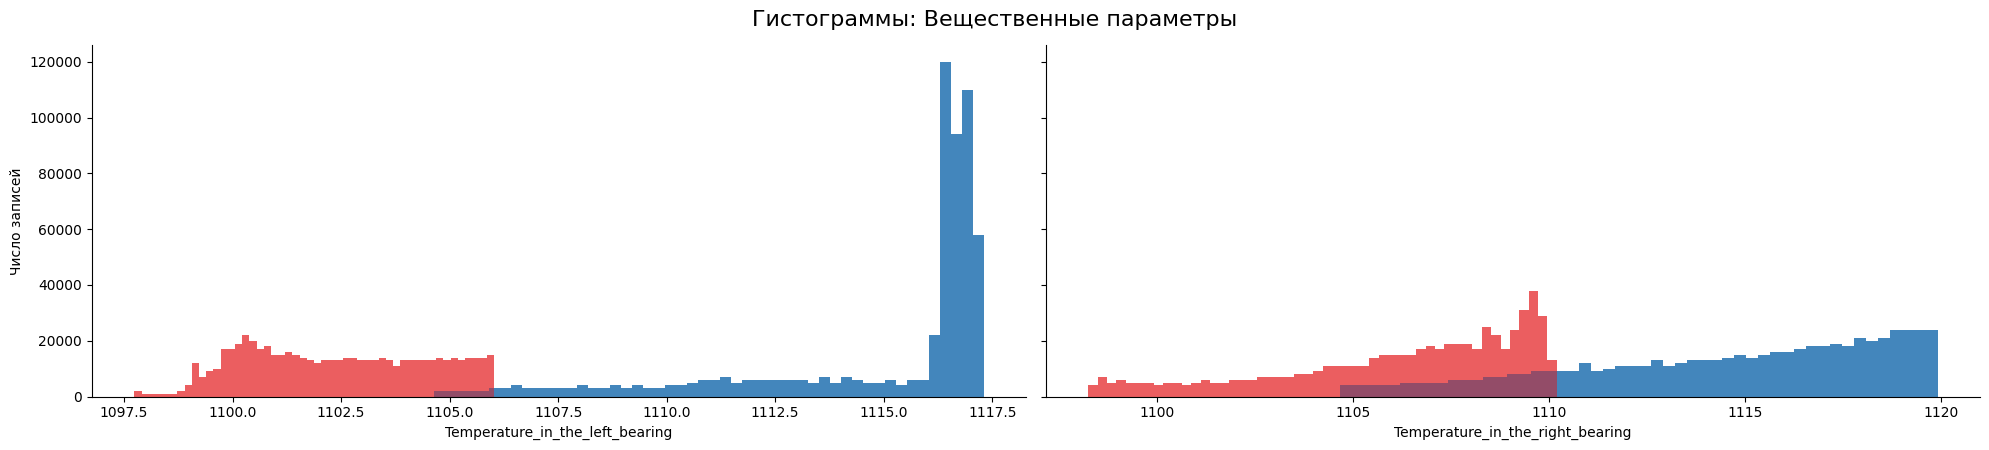

In [26]:
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(20, 5))
labels = ['Temperature_in_the_left_bearing', 'Temperature_in_the_right_bearing'] 
hist_for_atribute_set(df, labels, ax, bin_num=50, df2=df2, y_scale='linear')
hist_for_atribute_set(df, labels, ax, bin_num=50, df2=df2, y_scale='linear') 

ax[0].set_ylabel('Число записей')
plt.suptitle('Гистограммы: Вещественные параметры', fontsize=16, y=.92)
fig.tight_layout(rect=[0, .03, 1, .95])

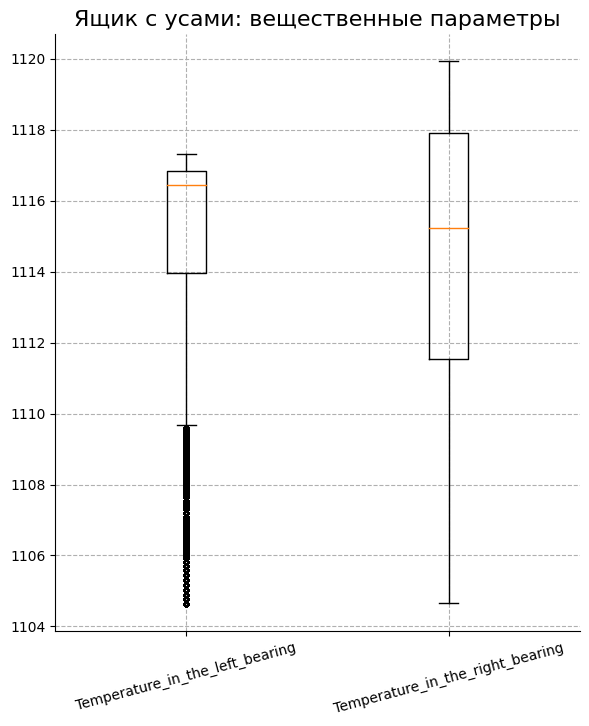

In [27]:
fig, ax = plt.subplots(sharey=True, figsize=(20, 8))
fig.set_figwidth(6)
plt.xticks(rotation=15)
boxplot_for_atribute_set(df, labels, ax)
ax.set_title('Ящик с усами: вещественные параметры', fontsize=16)

# уберем лишние границы графика
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# добавили немного больше координатной сетке, 
# чтобы более точно определить диапазоны значений
minor_ticks = np.arange(0, 101, 5)

ax.grid(linestyle='--' )
fig.tight_layout(rect=[0, .03, 1, .95])

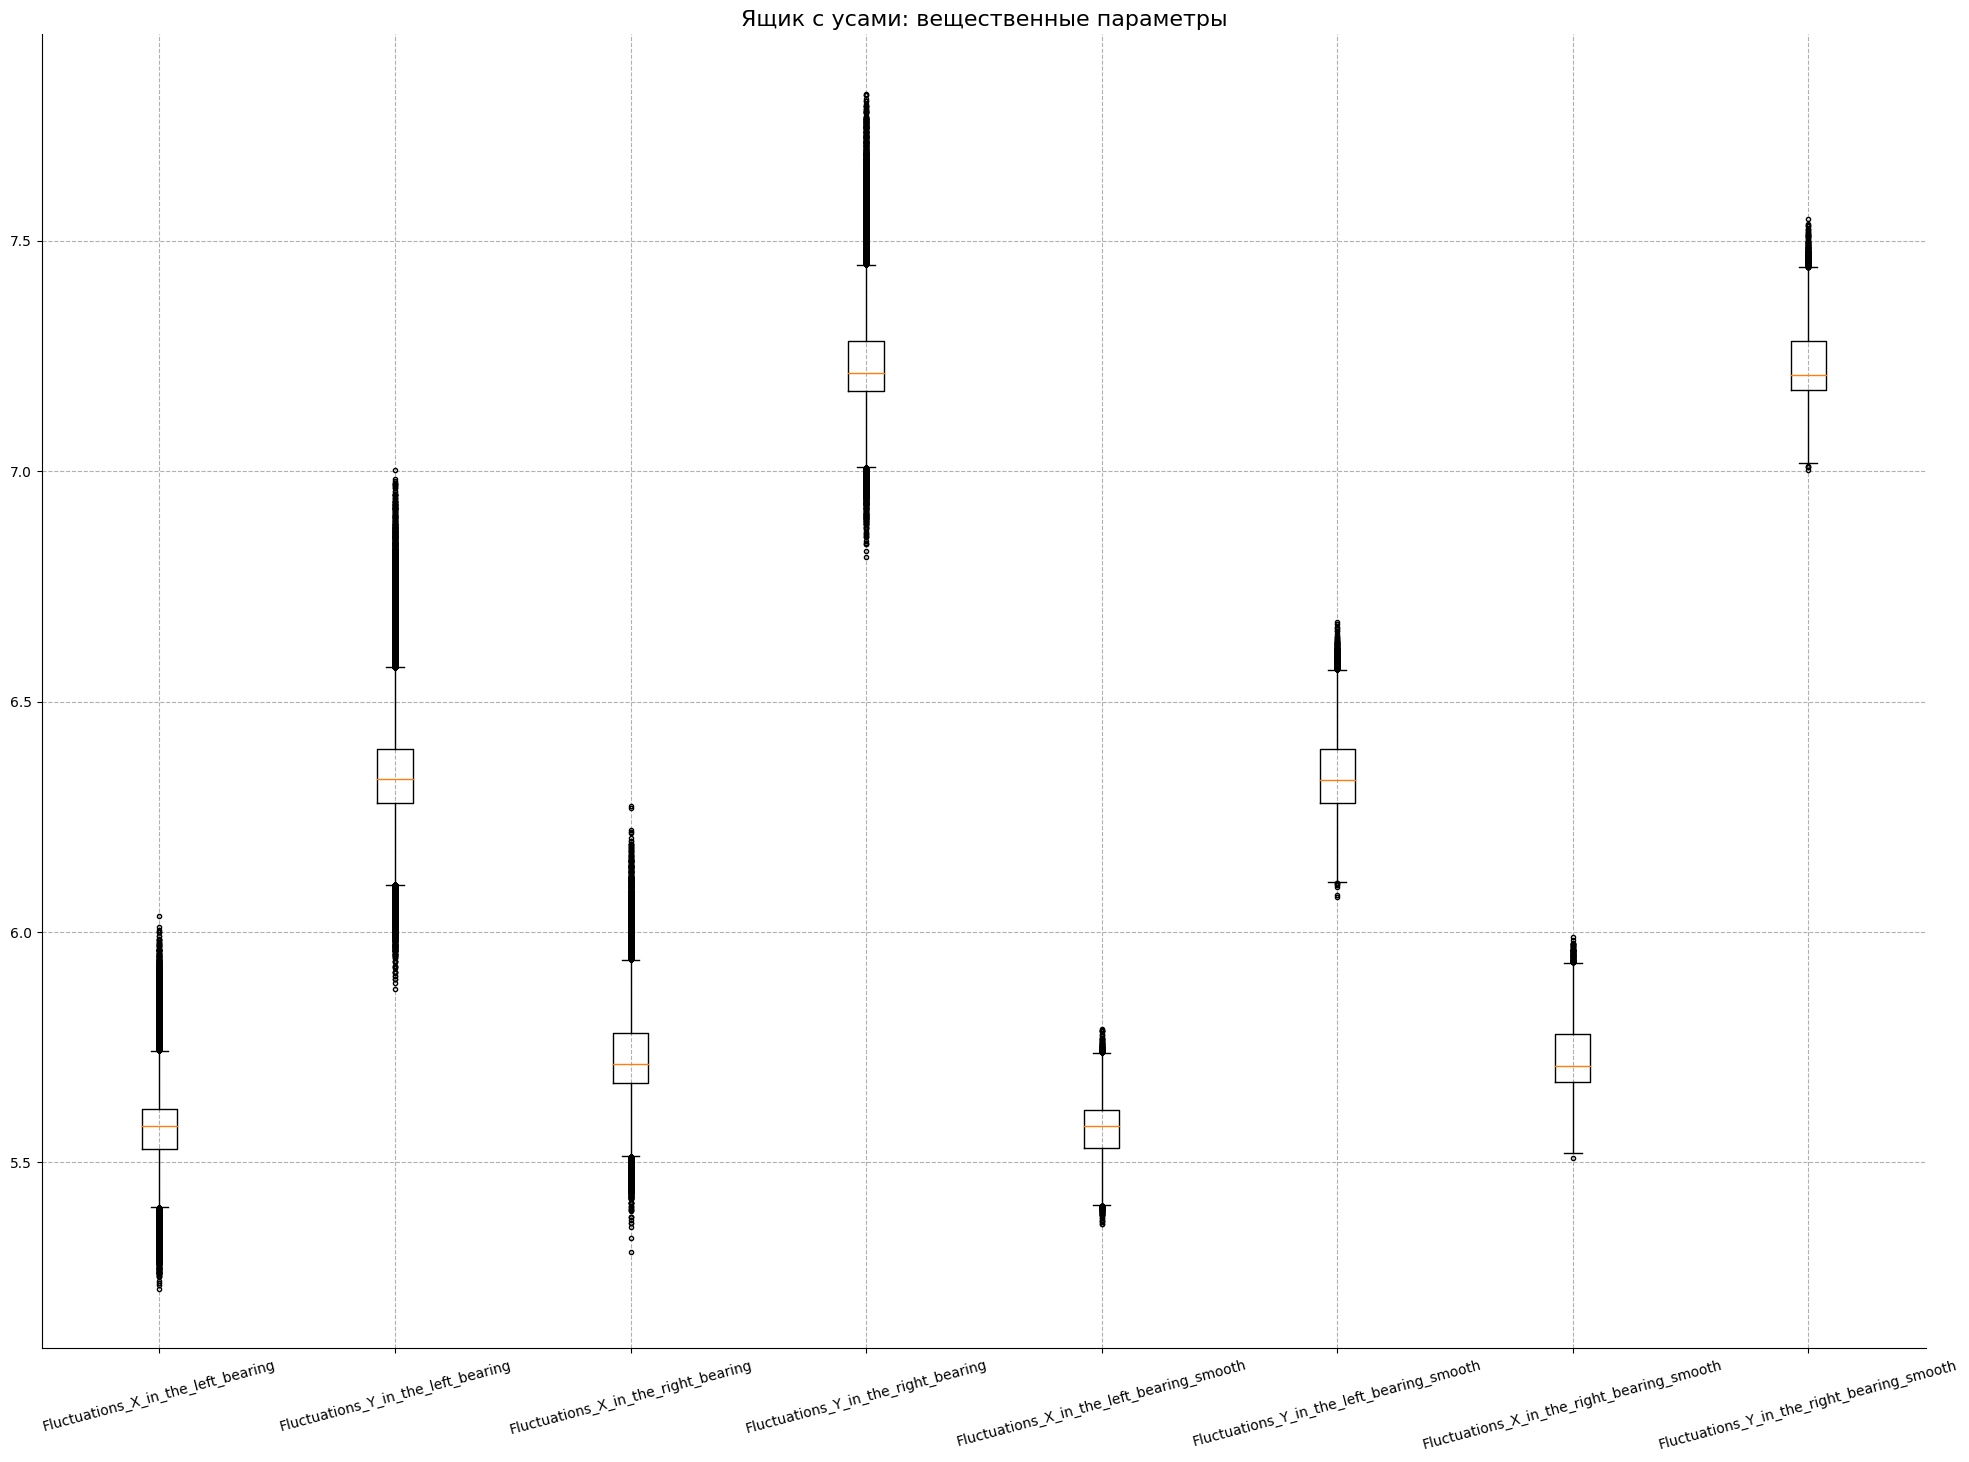

In [28]:
fig, ax = plt.subplots(sharey=True, figsize=(20, 16))
fig.set_figwidth(20)
plt.xticks(rotation=15)
labels = list(df.columns)
labels.remove('Temperature_in_the_left_bearing')
labels.remove('Temperature_in_the_right_bearing')
boxplot_for_atribute_set(df, labels, ax)
ax.set_title('Ящик с усами: вещественные параметры', fontsize=16)

# уберем лишние границы графика
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# добавили немного больше координатной сетке, 
# чтобы более точно определить диапазоны значений
minor_ticks = np.arange(0, 101, 5)

ax.grid(linestyle='--' )
fig.tight_layout(rect=[0, .03, 1, .95])

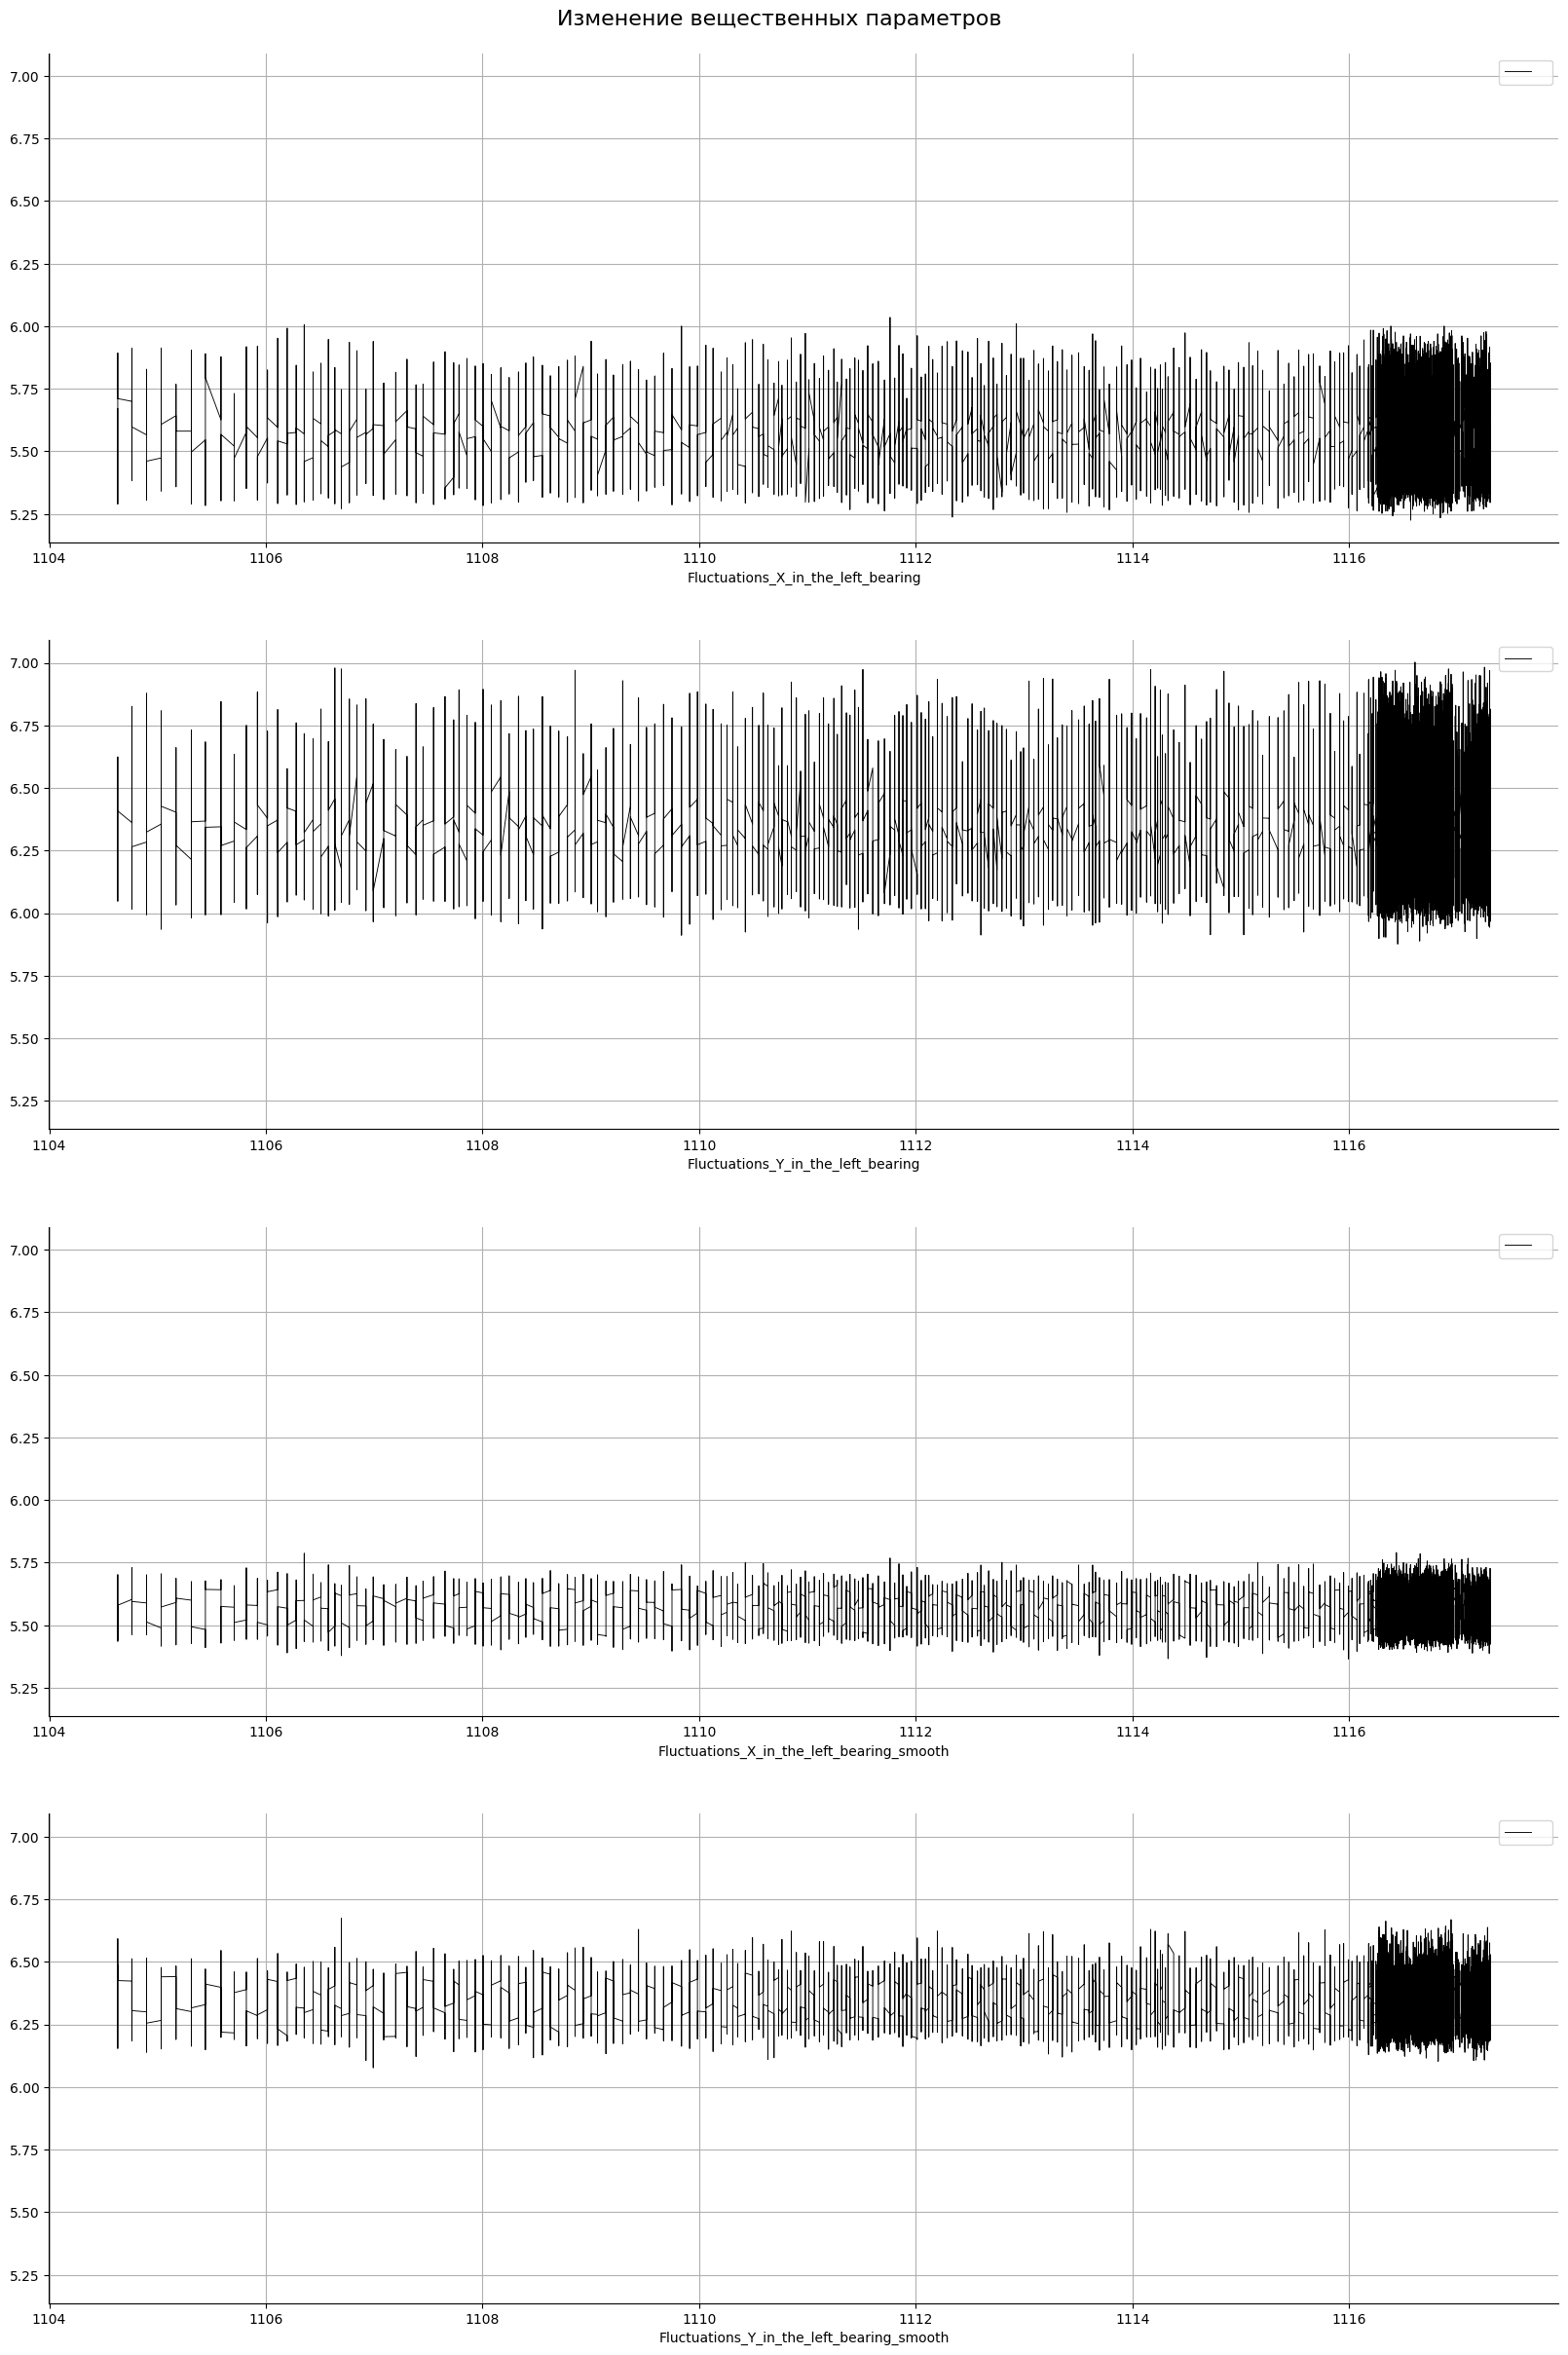

In [29]:
labels = list(df.columns)
labels.remove('Temperature_in_the_left_bearing')
labels.remove('Temperature_in_the_right_bearing')
labels.remove('Fluctuations_X_in_the_right_bearing')
labels.remove('Fluctuations_Y_in_the_right_bearing')
labels.remove('Fluctuations_X_in_the_right_bearing_smooth')
labels.remove('Fluctuations_Y_in_the_right_bearing_smooth')

    
fig, ax = plt.subplots(nrows=4, ncols=1, sharey=True, figsize=(20, 30))

lineplot_for_atribute_set(df, df['Temperature_in_the_left_bearing'],  labels, ax)
fig.suptitle('Изменение вещественных параметров', fontsize=16, y=.895)
plt.show()

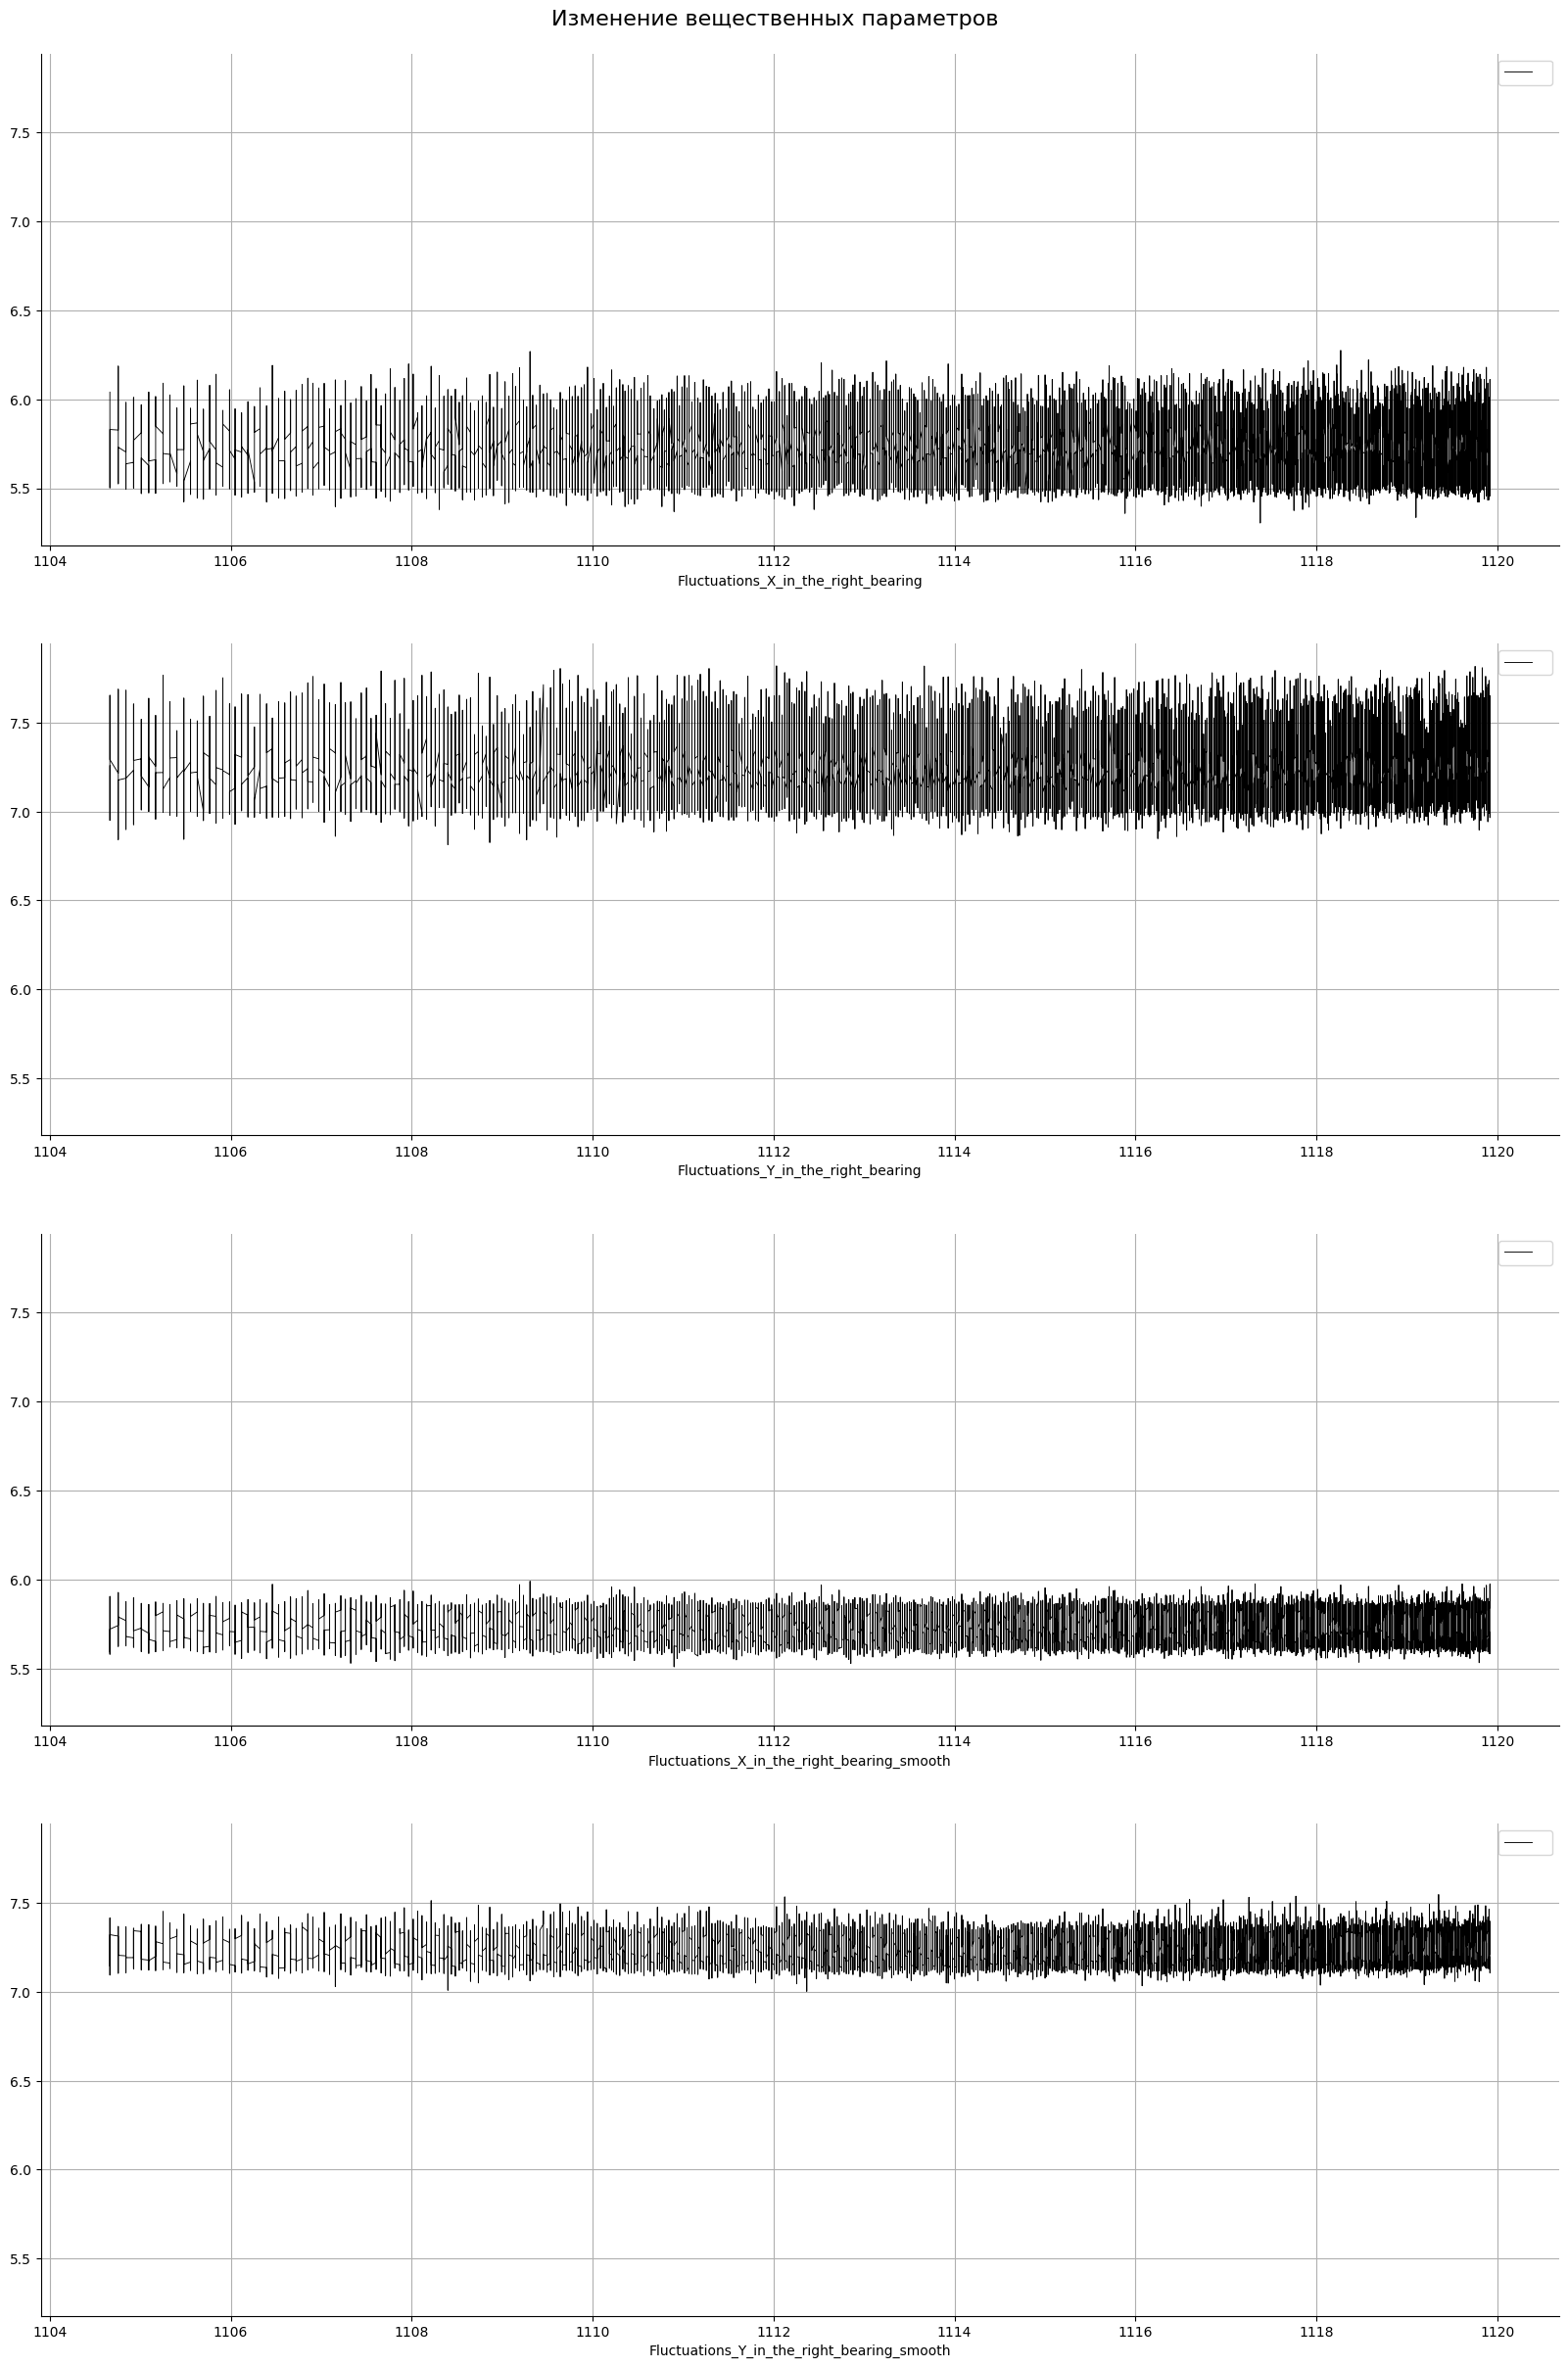

In [30]:
labels = list(df.columns)
labels.remove('Temperature_in_the_left_bearing')
labels.remove('Temperature_in_the_right_bearing')
labels.remove('Fluctuations_X_in_the_left_bearing')
labels.remove('Fluctuations_Y_in_the_left_bearing')
labels.remove('Fluctuations_X_in_the_left_bearing_smooth')
labels.remove('Fluctuations_Y_in_the_left_bearing_smooth')

    
fig, ax = plt.subplots(nrows=4, ncols=1, sharey=True, figsize=(20, 30))

lineplot_for_atribute_set(df, df['Temperature_in_the_right_bearing'],  labels, ax)
fig.suptitle('Изменение вещественных параметров', fontsize=16, y=.895)
plt.show()

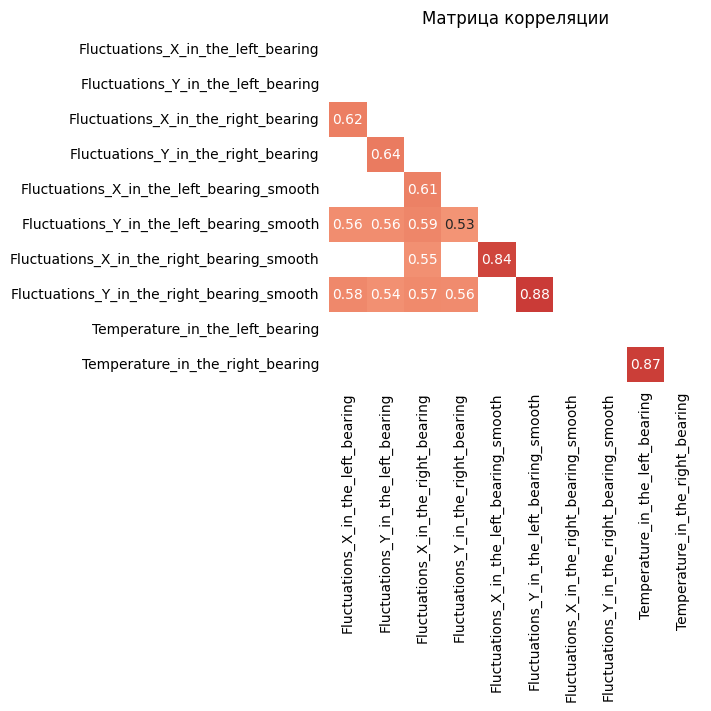

In [31]:
corr_labels = list(df.columns)
fig, ax = plt.subplots(figsize=(7, 7), constrained_layout=True)
hm = heatmap(df[corr_labels], ax, 'Матрица корреляции')

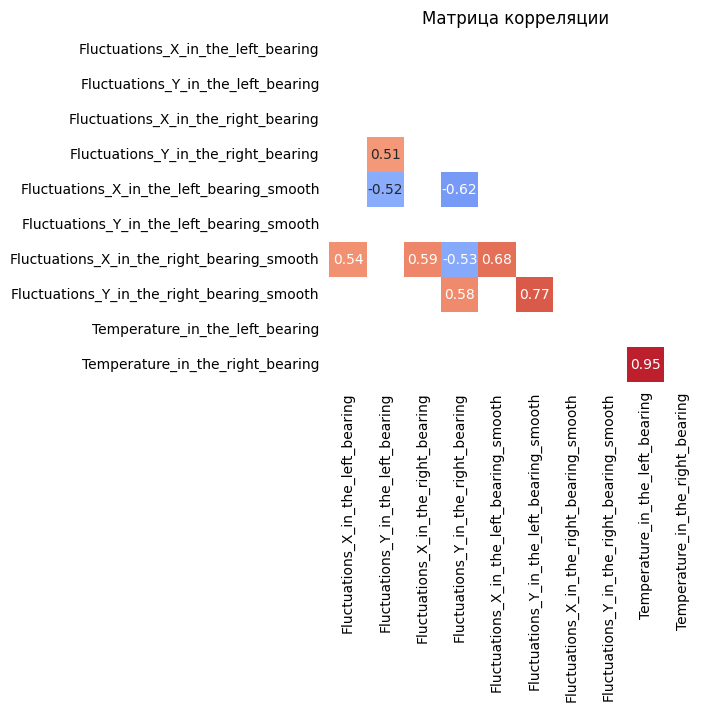

In [32]:
corr_labels = list(df2.columns)
fig, ax = plt.subplots(figsize=(7, 7), constrained_layout=True)
hm = heatmap(df2[corr_labels], ax, 'Матрица корреляции')